 **NFL Challange**


# Import Modules and Data

In [1]:
import pandas as pd
from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from sklearn.impute import SimpleImputer
from geopy.geocoders import Nominatim
pd.options.mode.chained_assignment = None  
%matplotlib inline
import mpl_toolkits
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn import preprocessing as prep
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.utils import check_array
from sklearn.neighbors import KNeighborsRegressor
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
#from keras.layers import Dropout
#from keras import regularizers
from sklearn.decomposition import PCA
import regex as re
#from sklearn_pandas import CategoricalImputer
from time import time
import warnings
import json
warnings.simplefilter("ignore", category=PendingDeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.utils import check_array
from scipy import sparse, stats
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from math import sqrt
from time import time
from sklearn.model_selection import RandomizedSearchCV

Read the datasets into a utf-8 encoded dataframe 

In [2]:
nfl_stadiums=pd.read_csv("../nfl-scores-and-betting-data/nfl_stadiums.csv",encoding = "utf-8")
nfl_teams=pd.read_csv("../nfl-scores-and-betting-data/nfl_teams.csv",encoding = "utf-8")
nfl_scores=pd.read_csv("../nfl-scores-and-betting-data/spreadspoke_scores.csv",encoding = "utf-8")

In [3]:
nfl_scores.head()

schedule_date  schedule_season schedule_week           team_home  \
0      9/2/1966             1966             1      Miami Dolphins   
1      9/3/1966             1966             1      Houston Oilers   
2      9/4/1966             1966             1  San Diego Chargers   
3      9/9/1966             1966             2      Miami Dolphins   
4     9/10/1966             1966             1   Green Bay Packers   

         team_away         stadium team_favorite_id  spread_favorite  \
0  Oakland Raiders     Orange Bowl              NaN              NaN   
1   Denver Broncos    Rice Stadium              NaN              NaN   
2    Buffalo Bills  Balboa Stadium              NaN              NaN   
3    New York Jets     Orange Bowl              NaN              NaN   
4  Baltimore Colts   Lambeau Field              NaN              NaN   

  over_under_line                         weather_detail  weather_temperature  \
0             NaN                                    NaN                 83.0   
1             NaN                                    NaN                 81.0   
2             NaN                                    NaN                 70.0   
3             NaN                                    NaN                 82.0   
4             NaN  64 degrees-  humidity 62%- wind 8 mph                 64.0   

   weather_wind_mph weather_humidity  score_home  score_away  stadium_neutral  \
0               6.0               71        14.0        23.0            False   
1               7.0               70        45.0         7.0            False   
2               7.0               82        27.0         7.0            False   
3              11.0               78        14.0        19.0            False   
4               8.0               62        24.0         3.0            False   

   schedule_playoff  
0             False  
1             False  
2             False  
3             False  
4             False

In [4]:
nfl_teams.head()

team_name team_name_short team_id team_id_pfr team_conference  \
0    Arizona Cardinals       Cardinals     ARI         CRD             NFC   
1    Phoenix Cardinals       Cardinals     ARI         CRD             NFC   
2  St. Louis Cardinals       Cardinals     ARI         ARI             NFC   
3      Atlanta Falcons         Falcons     ATL         ATL             NFC   
4     Baltimore Ravens          Ravens     BAL         RAV             AFC   

  team_division team_conference_pre2002 team_division_pre2002  
0      NFC West                     NFC              NFC West  
1           NaN                     NFC              NFC East  
2           NaN                     NFC              NFC East  
3     NFC South                     NFC              NFC West  
4     AFC North                     AFC           AFC Central

In [5]:
nfl_stadiums.head()

stadium_name   stadium_location  stadium_open  stadium_close  \
0         Alamo Dome    San Antonio, TX           NaN            NaN   
1     Alltel Stadium   Jacksonville, FL           NaN            NaN   
2     Alumni Stadium  Chestnut Hill, MA           NaN            NaN   
3    Anaheim Stadium        Anaheim, CA        1980.0         1994.0   
4  Arrowhead Stadium    Kansas City, MO        1972.0            NaN   

  stadium_type                           stadium_address  \
0       indoor     100 Montana St, San Antonio, TX 78203   
1          NaN                                       NaN   
2      outdoor     Perimeter Rd, Chestnut Hill, MA 02467   
3      outdoor  2000 E Gene Autry Way, Anaheim, CA 92806   
4      outdoor     1 Arrowhead Dr, Kansas City, MO 64129   

  stadium_weather_station_code stadium_weather_type stadium_capacity  \
0                        78203                 dome            72000   
1                          NaN                  NaN              NaN   
2                         2467                 cold              NaN   
3                        92806                 warm              NaN   
4                        64129                 cold           76,416   

  stadium_surface      STATION                       NAME  LATITUDE  \
0       FieldTurf          NaN                        NaN       NaN   
1             NaN          NaN                        NaN       NaN   
2           Grass          NaN                        NaN       NaN   
3             NaN          NaN                        NaN       NaN   
4           Grass  US1MOJC0028  KANSAS CITY 5.1 SE, MO US   39.0692   

   LONGITUDE  ELEVATION  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4   -94.4871      264.9

## Functions

The cell below contains various functions that will be required in this project

In [6]:
def pct(x):
    return round(100*x,1)
def count_null(df,column): # count the number of null values in a dataframe
    try:
        for x in column:
            null=sum(pd.isnull(df[x]))
            print(x,null)
    except Exception:
            pass
class DataFrameSelector(BaseEstimator, TransformerMixin): # Select attributes of a dataframe
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
class CategoricalEncoder(BaseEstimator, TransformerMixin): #Encode categorical features of the dataframe 
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out
def ttest(control, treatment): #perform a ttest statistic of the experiment
    #paired t-test; two-tailed p-value      A   ,    B
    (t_score, p_value) = stats.ttest_rel(control, treatment)

    if p_value > 0.05/2:  #Two sided 
        print('There is no significant difference between the two machine learning pipelines (Accept H0)')
    else:
        print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
        if t_score > 0.0: #in the case of regression lower RMSE is better; A is lower 
            print('Machine learning pipeline A is better than B')
        else:
            print('Machine learning pipeline B is better than A')
    return p_value

def create_model(kernel_initializer='uniform',dropout=0.2):
    model = Sequential()
    model.add(Dense(40,activation='relu',kernel_initializer=kernel_initializer,kernel_regularizer=regularizers.L1L2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(41,activation='tanh',kernel_initializer=kernel_initializer,kernel_regularizer=regularizers.L1L2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer=kernel_initializer,activation='linear'))
    model.add(Dropout(dropout))
    model.compile(loss="mean_squared_error",optimizer="SGD", metrics=["mse"])
    return model

# Fix Nulls

The goal is to remove nulls in the datasets.

In [7]:
# Create a list of all the columns in each dataset
column_teams=list(nfl_teams.columns)
column_scores=list(nfl_scores.columns)
column_stadiums=list(nfl_stadiums.columns)

In [10]:
#What the scores table looks like
nfl_scores.head()

schedule_date  schedule_season schedule_week           team_home  \
2734    1980-09-07             1980             1       Buffalo Bills   
2735    1980-09-07             1980             1  Cincinnati Bengals   
2736    1980-09-07             1980             1   Green Bay Packers   
2737    1980-09-07             1980             1  Kansas City Chiefs   
2738    1980-09-07             1980             1    Los Angeles Rams   

                 team_away               stadium team_favorite_id  \
2734        Miami Dolphins  Ralph Wilson Stadium              MIA   
2735  Tampa Bay Buccaneers         Cinergy Field               TB   
2736         Chicago Bears         Lambeau Field              CHI   
2737       Oakland Raiders     Arrowhead Stadium               KC   
2738         Detroit Lions       Anaheim Stadium              LAR   

      spread_favorite over_under_line weather_detail  weather_temperature  \
2734             -3.0              35            NaN                 64.0   
2735             -1.0              34            NaN                 72.0   
2736             -6.0              35            NaN                 65.0   
2737             -3.0              42            NaN                 82.0   
2738             -9.0              38            NaN                 66.0   

      weather_wind_mph weather_humidity  score_home  score_away  \
2734               8.0               66        17.0         7.0   
2735               9.0               81        12.0        17.0   
2736               5.0               77        12.0         6.0   
2737              10.0               58        14.0        27.0   
2738              11.0               70        20.0        41.0   

      stadium_neutral  schedule_playoff  
2734            False             False  
2735            False             False  
2736            False             False  
2737            False             False  
2738            False             False

## Nulls for NFL Scores

**Actions in this Section**
* Convert the date to a datetime format.
* Drop unnececcary rows where nulls exists.
* Use only rows where games happened after 1980 due to a lot of nulls before 1980.
* Change playoff schdule to week headings.

In [8]:
#Current Nulls
count_null(nfl_scores,column_scores)

schedule_date 0
schedule_season 0
schedule_week 0
team_home 0
team_away 0
stadium 0
team_favorite_id 2601
spread_favorite 2601
over_under_line 2611
weather_detail 7930
weather_temperature 724
weather_wind_mph 724
weather_humidity 4013
score_home 135
score_away 135
stadium_neutral 0
schedule_playoff 0


In [9]:
#Clean the scores dataset and drop null values
nfl_scores["schedule_date"]=pd.to_datetime(nfl_scores["schedule_date"])
nfl_scores.dropna(subset=["score_home","over_under_line","weather_temperature","weather_wind_mph"], inplace=True)
nfl_scores=nfl_scores[nfl_scores['schedule_date'].dt.year >= 1980]

In [11]:
nfl_scores.drop(["weather_humidity","weather_detail","schedule_playoff"], axis=1,inplace=True)

In [12]:
#nfl_scores.loc[(nfl_scores.schedule_week == '18'), 'schedule_week'] = '18'
nfl_scores.loc[(nfl_scores.schedule_week == 'Wildcard') | (nfl_scores.schedule_week == 'WildCard'), 'schedule_week'] = '18'
nfl_scores.loc[(nfl_scores.schedule_week == 'Division'), 'schedule_week'] = '19'
nfl_scores.loc[(nfl_scores.schedule_week == 'Conference'), 'schedule_week'] = '20'
nfl_scores.loc[(nfl_scores.schedule_week == 'Superbowl') | (nfl_scores.schedule_week == 'SuperBowl'), 'schedule_week'] = '21'
nfl_scores['schedule_week'] = nfl_scores.schedule_week.astype(int)

In [13]:
count_null(nfl_scores,column_scores)

schedule_date 0
schedule_season 0
schedule_week 0
team_home 0
team_away 0
stadium 0
team_favorite_id 0
spread_favorite 0
over_under_line 0


The output result above shows no null values present in the scores dataset

In [14]:
nfl_scores.head()

schedule_date  schedule_season  schedule_week           team_home  \
2734    1980-09-07             1980              1       Buffalo Bills   
2735    1980-09-07             1980              1  Cincinnati Bengals   
2736    1980-09-07             1980              1   Green Bay Packers   
2737    1980-09-07             1980              1  Kansas City Chiefs   
2738    1980-09-07             1980              1    Los Angeles Rams   

                 team_away               stadium team_favorite_id  \
2734        Miami Dolphins  Ralph Wilson Stadium              MIA   
2735  Tampa Bay Buccaneers         Cinergy Field               TB   
2736         Chicago Bears         Lambeau Field              CHI   
2737       Oakland Raiders     Arrowhead Stadium               KC   
2738         Detroit Lions       Anaheim Stadium              LAR   

      spread_favorite over_under_line  weather_temperature  weather_wind_mph  \
2734             -3.0              35                 64.0               8.0   
2735             -1.0              34                 72.0               9.0   
2736             -6.0              35                 65.0               5.0   
2737             -3.0              42                 82.0              10.0   
2738             -9.0              38                 66.0              11.0   

      score_home  score_away  stadium_neutral  
2734        17.0         7.0            False  
2735        12.0        17.0            False  
2736        12.0         6.0            False  
2737        14.0        27.0            False  
2738        20.0        41.0            False

## Nulls for NFL Teams

In [15]:
count_null(nfl_teams,column_teams)

team_name 0
team_name_short 0
team_id 0
team_id_pfr 0
team_conference 0
team_division 8
team_conference_pre2002 0
team_division_pre2002 2


Team division and team_division_pre2002 both contain null values

In [18]:
nfl_teams.head()

team_name team_name_short team_id team_id_pfr team_conference  \
0    Arizona Cardinals       Cardinals     ARI         CRD             NFC   
1    Phoenix Cardinals       Cardinals     ARI         CRD             NFC   
2  St. Louis Cardinals       Cardinals     ARI         ARI             NFC   
3      Atlanta Falcons         Falcons     ATL         ATL             NFC   
4     Baltimore Ravens          Ravens     BAL         RAV             AFC   

  team_division team_conference_pre2002 team_division_pre2002  
0      NFC West                     NFC              NFC West  
1           NaN                     NFC              NFC East  
2           NaN                     NFC              NFC East  
3     NFC South                     NFC              NFC West  
4     AFC North                     AFC           AFC Central

In [17]:
null_columns=nfl_teams.columns[nfl_teams.isnull().any()]
print(nfl_teams[nfl_teams["team_division_pre2002"].isnull()][null_columns])

   team_division team_division_pre2002
14     AFC South                   NaN
26           NaN                   NaN


## Nulls for NFL Stadiums
**Actions in this Section**
* Fill in nulls of stadium close with 2018 for better visualizations.
* Fill in the NA of the Lat, Long and Elevation with 0's for easy manipulation.
* Drop Stadium Close with nulls
* Drop Unneccesary columns.
* Fill in missing lattitude and Longitude with accurate geopoints.

In [16]:
nfl_stadiums['stadium_close'] = nfl_stadiums['stadium_close'].fillna(2018)
nfl_stadiums['LATITUDE'] = nfl_stadiums['LATITUDE'].fillna(0)
nfl_stadiums['LONGITUDE'] = nfl_stadiums['LONGITUDE'].fillna(0)
nfl_stadiums['ELEVATION'] = nfl_stadiums['ELEVATION'].fillna(0)
nfl_stadiums=nfl_stadiums[(nfl_stadiums['stadium_close'] >= 1980)]
count_null(nfl_stadiums,column_stadiums)

stadium_name 0
stadium_location 0
stadium_open 23
stadium_close 0
stadium_type 7
stadium_address 9
stadium_weather_station_code 10
stadium_weather_type 7
stadium_capacity 58
stadium_surface 45
STATION 44
NAME 44
LATITUDE 0
LONGITUDE 0
ELEVATION 0


In [20]:
print(len(nfl_stadiums))

nfl_stadiums.head(5)

96


stadium_name   stadium_location  stadium_open  stadium_close  \
0         Alamo Dome    San Antonio, TX           NaN         2018.0   
1     Alltel Stadium   Jacksonville, FL           NaN         2018.0   
2     Alumni Stadium  Chestnut Hill, MA           NaN         2018.0   
3    Anaheim Stadium        Anaheim, CA        1980.0         1994.0   
4  Arrowhead Stadium    Kansas City, MO        1972.0         2018.0   

  stadium_type                           stadium_address  \
0       indoor     100 Montana St, San Antonio, TX 78203   
1          NaN                                       NaN   
2      outdoor     Perimeter Rd, Chestnut Hill, MA 02467   
3      outdoor  2000 E Gene Autry Way, Anaheim, CA 92806   
4      outdoor     1 Arrowhead Dr, Kansas City, MO 64129   

  stadium_weather_station_code stadium_weather_type stadium_capacity  \
0                        78203                 dome            72000   
1                          NaN                  NaN              NaN   
2                         2467                 cold              NaN   
3                        92806                 warm              NaN   
4                        64129                 cold           76,416   

  stadium_surface      STATION                       NAME   LATITUDE  \
0       FieldTurf          NaN                        NaN  29.418444   
1             NaN          NaN                        NaN  34.220389   
2           Grass          NaN                        NaN  42.333863   
3             NaN          NaN                        NaN  33.799625   
4           Grass  US1MOJC0028  KANSAS CITY 5.1 SE, MO US  39.069200   

    LONGITUDE  ELEVATION  
0  -98.477753        0.0  
1   70.380031        0.0  
2  -71.165223        0.0  
3 -117.889094        0.0  
4  -94.487100      264.9

In [19]:
#Fills in the Latitude, Longitude and Elevation where it is missing.
geolocator = Nominatim(user_agent="NFL")
for i, row in nfl_stadiums.iterrows():
    try:
        if nfl_stadiums.LATITUDE[i]==0:
            location = geolocator.geocode(nfl_stadiums.stadium_address[i])
            nfl_stadiums.LATITUDE[i]=location.latitude
            nfl_stadiums.LONGITUDE[i]=location.longitude
            nfl_stadiums.ELEVATION[i]=location.altitude
        else:
            pass
    except:
        pass

In [23]:
#drop unnecessary tables
nfl_stadiums.dropna(subset=["stadium_open"], inplace=True)
nfl_stadiums.drop(["NAME","stadium_surface", "stadium_capacity", "STATION","stadium_weather_station_code"], axis=1,inplace=True)

In [22]:
#Fill NA values of the stadiums dataset
nfl_stadiums['stadium_close'] = nfl_stadiums['stadium_close'].fillna(2020)
nfl_stadiums['LATITUDE'] = nfl_stadiums['LATITUDE'].fillna(0)
nfl_stadiums['LONGITUDE'] = nfl_stadiums['LONGITUDE'].fillna(0)
nfl_stadiums['ELEVATION'] = nfl_stadiums['ELEVATION'].fillna(0)
nfl_stadiums=nfl_stadiums[(nfl_stadiums['stadium_close'] >= 1980)]

In [21]:
geolocator = Nominatim(user_agent="NFL")
for i, row in nfl_stadiums.iterrows():
    try:
        if nfl_stadiums.LATITUDE[i]==0:
            location = geolocator.geocode(nfl_stadiums.stadium_address[i])
            nfl_stadiums.LATITUDE[i]=location.latitude
            nfl_stadiums.LONGITUDE[i]=location.longitude
            nfl_stadiums.ELEVATION[i]=location.altitude
        else:
            pass
    except:
        pass
        

In [24]:
count_null(nfl_stadiums,column_stadiums)

stadium_name 0
stadium_location 0
stadium_open 0
stadium_close 0
stadium_type 0
stadium_address 0


# EDA

This section will involve exploratory data analysis of the three datasets 

## EDA for NFL_Scores

In [25]:
nfl_scores.head()

schedule_date  schedule_season  schedule_week           team_home  \
2734    1980-09-07             1980              1       Buffalo Bills   
2735    1980-09-07             1980              1  Cincinnati Bengals   
2736    1980-09-07             1980              1   Green Bay Packers   
2737    1980-09-07             1980              1  Kansas City Chiefs   
2738    1980-09-07             1980              1    Los Angeles Rams   

                 team_away               stadium team_favorite_id  \
2734        Miami Dolphins  Ralph Wilson Stadium              MIA   
2735  Tampa Bay Buccaneers         Cinergy Field               TB   
2736         Chicago Bears         Lambeau Field              CHI   
2737       Oakland Raiders     Arrowhead Stadium               KC   
2738         Detroit Lions       Anaheim Stadium              LAR   

      spread_favorite over_under_line  weather_temperature  weather_wind_mph  \
2734             -3.0              35                 64.0               8.0   
2735             -1.0              34                 72.0               9.0   
2736             -6.0              35                 65.0               5.0   
2737             -3.0              42                 82.0              10.0   
2738             -9.0              38                 66.0              11.0   

      score_home  score_away  stadium_neutral  
2734        17.0         7.0            False  
2735        12.0        17.0            False  
2736        12.0         6.0            False  
2737        14.0        27.0            False  
2738        20.0        41.0            False

In [26]:
nfl_scores.shape

(9181, 14)

In [30]:
nfl_scores.dtypes

schedule_date          datetime64[ns]
schedule_season                 int64
schedule_week                   int32
team_home                      object
team_away                      object
stadium                        object
team_favorite_id               object
spread_favorite               float64
over_under_line               float64
weather_temperature           float64
weather_wind_mph              float64
score_home                    float64
score_away                    float64
stadium_neutral                  bool
dtype: object

In [29]:
nfl_scores['over_under_line'] = nfl_scores['over_under_line'].astype(float)

In [28]:
nfl_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9181 entries, 2734 to 12264
Data columns (total 14 columns):
schedule_date          9181 non-null datetime64[ns]
schedule_season        9181 non-null int64
schedule_week          9181 non-null int32
team_home              9181 non-null object
team_away              9181 non-null object
stadium                9181 non-null object
team_favorite_id       9181 non-null object
spread_favorite        9181 non-null float64
over_under_line        9181 non-null object
weather_temperature    9181 non-null float64
weather_wind_mph       9181 non-null float64
score_home             9181 non-null float64
score_away             9181 non-null float64
stadium_neutral        9181 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(5), int32(1), int64(1), object(5)
memory usage: 977.3+ KB


In [27]:
nfl_scores.describe().transpose()

count         mean        std     min     25%     50%  \
schedule_season      9181.0  1999.701884  10.993210  1980.0  1990.0  2000.0   
schedule_week        9181.0     8.924191   4.974480     1.0     5.0     9.0   
spread_favorite      9181.0    -5.348219   3.415997   -26.5    -7.0    -4.5   
weather_temperature  9181.0    59.752423  15.481616    -6.0    49.0    63.0   
weather_wind_mph     9181.0     7.389936   5.692980     0.0     2.0     8.0   
score_home           9181.0    22.561159  10.349465     0.0    16.0    22.0   
score_away           9181.0    19.880841  10.042576     0.0    13.0    20.0   

                        75%     max  
schedule_season      2009.0  2018.0  
schedule_week          13.0    21.0  
spread_favorite        -3.0     0.0  
weather_temperature    72.0    97.0  
weather_wind_mph       11.0    40.0  
score_home             30.0    62.0  
score_away             27.0    59.0

### Change Name mappings

There were some inconsistancies in the data set. For example, the Chicago Bears were referenced by CHI and Chicago Bears. So made all the name callings but the short two or three letter code. 


In [31]:
name_mappings = [('ATL','Atlanta Falcons'),
                 ('BUF', 'Buffalo Bills'),
                 ('JAX','Jacksonville Jaguars'),
                 ('DAL', 'Dallas Cowboys'),
                 ('GB', 'Green Bay Packers'),
                 ('IND','Indianapolis Colts'),
                 ('MIA', 'Miami Dolphins'),
                 ('MIN','Minnesota Vikings'),
                 ('TB', 'Tampa Bay Buccaneers'),
                 ('NYG','New York Giants'),
                 ('OAK', 'Oakland Raiders'),
                 ('BAL','Baltimore Ravens'),
                 ('WAS', 'Washington Redskins'),
                 ('LAR', 'Los Angeles Rams'),
                 ('ARI', 'Arizona Cardinals'),
                 ('CIN', 'Cincinnati Bengals'),
                 ('DEN', 'Denver Broncos'),
                 ('PHI', 'Philadelphia Eagles'),
                 ('LAC','Los Angeles Chargers'),
                 ('CAR','Carolina Panthers'),
                 ('TEN','Tennessee Titans'),
                 ('NYJ', 'New York Jets'),
                 ('CHI', 'Chicago Bears'),
                 ('LAR', 'St. Louis Rams'),
                 ('PIT', 'Pittsburgh Steelers'),
                 ('KC', 'Kansas City Chiefs'),
                 ('LAC', 'San Diego Chargers'),
                 ('NE','New England Patriots'),
                 ('SEA','Seattle Seahawks'),
                 ('NO', 'New Orleans Saints'),
                 ('DET', 'Detroit Lions'),
                 ('SF', 'San Francisco 49ers'),
                 ('CLE', 'Cleveland Browns'),
                 ('HOU', 'Houston Texans'),
                 ('TEN','Houston Oilers'),
                 ('OAK','Los Angeles Raiders'),
                 ('ARI','St. Louis Cardinals'),
                 ('ARI','Phoenix Cardinals'),
                 ('IND','Baltimore Colts'),
                 ('TEN','Tennessee Oilers')]
    
for mapping in name_mappings:
    nfl_scores.team_away.replace(mapping[1], mapping[0],inplace=True)
    nfl_scores.team_home.replace(mapping[1], mapping[0],inplace=True)

In later examining our dataset, we noticed an error where DET was listed as playing twice in a single week (shown below). The second instance was actually their week 5 game (instead of two week 4), so we corrected that in place. 

In [34]:
nfl_scores.head()

schedule_date  schedule_season  schedule_week team_home team_away  \
2734    1980-09-07             1980              1       BUF       MIA   
2735    1980-09-07             1980              1       CIN        TB   
2736    1980-09-07             1980              1        GB       CHI   
2737    1980-09-07             1980              1        KC       OAK   
2738    1980-09-07             1980              1       LAR       DET   

                   stadium team_favorite_id  spread_favorite  over_under_line  \
2734  Ralph Wilson Stadium              MIA             -3.0             35.0   
2735         Cinergy Field               TB             -1.0             34.0   
2736         Lambeau Field              CHI             -6.0             35.0   
2737     Arrowhead Stadium               KC             -3.0             42.0   
2738       Anaheim Stadium              LAR             -9.0             38.0   

      weather_temperature  weather_wind_mph  score_home  score_away  \
2734                 64.0               8.0        17.0         7.0   
2735                 72.0               9.0        12.0        17.0   
2736                 65.0               5.0        12.0         6.0   
2737                 82.0              10.0        14.0        27.0   
2738                 66.0              11.0        20.0        41.0   

      stadium_neutral  
2734            False  
2735            False  
2736            False  
2737            False  
2738            False

In [33]:
nfl_scores[((nfl_scores['team_home'] == 'DET') | (nfl_scores['team_away'] == 'DET')) & 
           (nfl_scores['schedule_season'] == 1990) & (nfl_scores['schedule_week'] == 4)]

schedule_date  schedule_season  schedule_week team_home team_away  \
4959    1990-09-30             1990              4       DET        GB   

                 stadium team_favorite_id  spread_favorite  over_under_line  \
4959  Pontiac Silverdome              DET             -2.5             46.0   

      weather_temperature  weather_wind_mph  score_home  score_away  \
4959                 72.0               0.0        21.0        24.0   

      stadium_neutral  
4959            False

In [32]:
nfl_scores.at[4978, 'schedule_week'] = 5

In [35]:
nfl_scores[((nfl_scores['team_home'] == 'DET') | (nfl_scores['team_away'] == 'DET')) & 
         (nfl_scores['schedule_season'] == 1990) & (nfl_scores['schedule_week'].between(4,5, inclusive = True) )]

schedule_date  schedule_season  schedule_week team_home team_away  \
4959    1990-09-30             1990              4       DET        GB   
4978    1990-10-07             1990              5       MIN       DET   

                           stadium team_favorite_id  spread_favorite  \
4959            Pontiac Silverdome              DET             -2.5   
4978  Hubert H. Humphrey Metrodome              MIN             -7.0   

      over_under_line  weather_temperature  weather_wind_mph  score_home  \
4959             46.0                 72.0               0.0        21.0   
4978             43.0                 72.0               0.0        27.0   

      score_away  stadium_neutral  
4959        24.0            False  
4978        34.0            False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028CAD869278>,
      dtype=object)

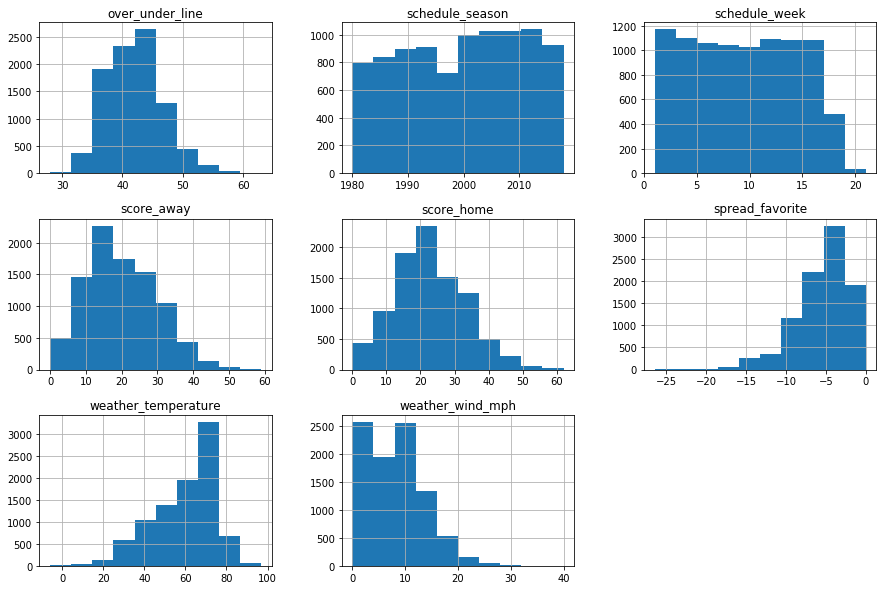

In [37]:
num_nfl_scores = nfl_scores[["schedule_season","schedule_week","spread_favorite","over_under_line",
                            "weather_temperature","weather_wind_mph","score_home","score_away"]]
num_nfl_scores.hist(figsize=(15,10))

In [38]:
#Out of the 8 attributes, over_under_line, score_away, and score_home are somewhat bell-shaped though skewed to the left.

     Compute the correlation the different attributes with relation to the spread_favorite

In [39]:
corr = nfl_scores.corr()
corr['spread_favorite'].sort_values(ascending=False)

spread_favorite        1.000000
score_away             0.125770
weather_temperature    0.066207
stadium_neutral        0.010537
schedule_season       -0.015780
weather_wind_mph      -0.028922
over_under_line       -0.045582
schedule_week         -0.076572
score_home            -0.140107
Name: spread_favorite, dtype: float64

In [40]:
#Score_away and score_home possess the highest correlation based on the output above

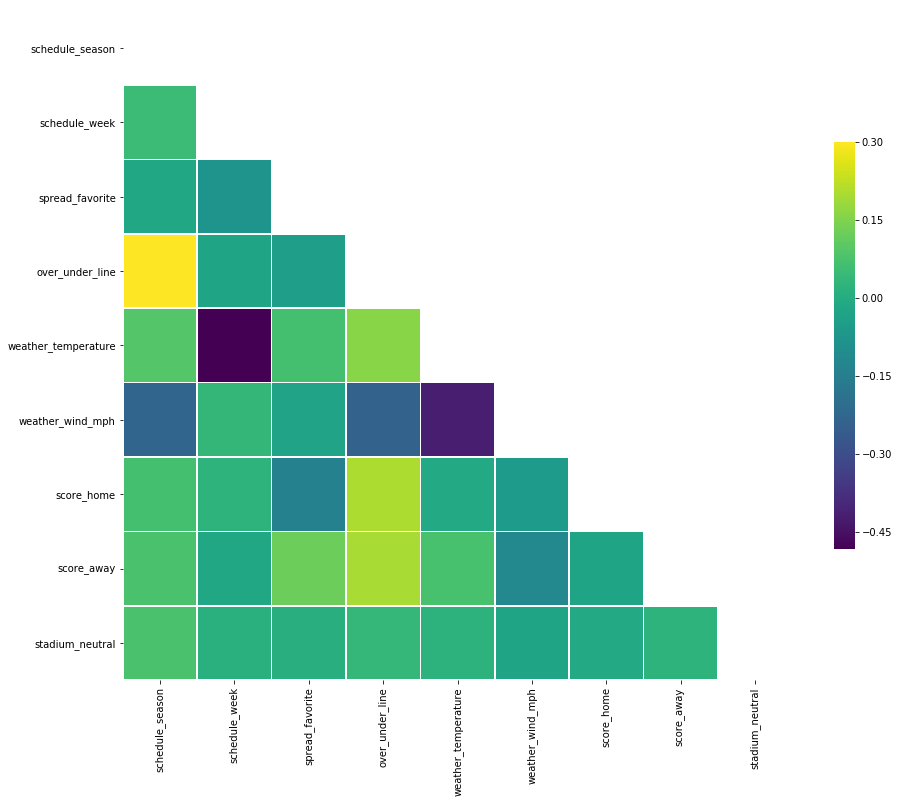

In [41]:
# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="viridis", vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


for tick in ax.get_yticklabels():
    tick.set_rotation(0);

### EDA for NFL Teams

#### Find the total number of teams
There are 33 unique teams. 

In [42]:
unique_teams = nfl_teams['team_name_short'].unique()
print('# of Unique Teams (all eras)',len(unique_teams))
unique_teams

# of Unique Teams (all eras) 33


array(['Cardinals', 'Falcons', 'Ravens', 'Bills', 'Panthers', 'Bears',
       'Bengals', 'Browns', 'Cowboys', 'Broncos', 'Lions', 'Packers',
       'Texans', 'Colts', 'Jaguars', 'Chiefs', 'Chargers', 'Rams',
       'Dolphins', 'Vikings', 'Patriots', 'Saints', 'Giants', 'Jets',
       'Raiders', 'Eagles', 'Steelers', 'Seahawks', '49ers', 'Buccaneers',
       'Oilers', 'Titans', 'Redskins'], dtype=object)

#### Find the teams who have moved cities
Seven teams have moved (listed below) with the Cardinals moving the most (3 times)

In [43]:
team_counts = nfl_teams['team_name_short'].value_counts()
moved_teams = team_counts[team_counts>1]

print('# of Moved Teams', len(moved_teams))
moved_teams

# of Moved Teams 7


Cardinals    3
Chargers     2
Patriots     2
Rams         2
Raiders      2
Oilers       2
Colts        2
Name: team_name_short, dtype: int64

#### For those teams that moved cities, find which cities they were associated with. 

In [44]:
all_cities = []

for i in moved_teams.index: 
    full_names = nfl_teams[nfl_teams['team_name_short']==i]['team_name'].tolist()
    cities = [x.replace(i,'') for x in full_names]
    all_cities.append(cities)

pd.DataFrame({'Team':moved_teams.index, 
              'Cities':all_cities})

Team                            Cities
0  Cardinals  [Arizona , Phoenix , St. Louis ]
1   Chargers        [Los Angeles , San Diego ]
2   Patriots           [New England , Boston ]
3       Rams        [Los Angeles , St. Louis ]
4    Raiders          [Los Angeles , Oakland ]
5     Oilers            [Houston , Tennessee ]
6      Colts       [Baltimore , Indianapolis ]

#### Which teams are no longer around? 

In [45]:
extinct_teams = nfl_teams.team_name[nfl_teams.team_division.isna()]
extinct_teams

1       Phoenix Cardinals
2     St. Louis Cardinals
15        Baltimore Colts
22         St. Louis Rams
26        Boston Patriots
30    Los Angeles Raiders
37         Houston Oilers
38       Tennessee Oilers
Name: team_name, dtype: object

#### For the teams that are no longer around, which franchises did they become? 

In [46]:
current_team_names = nfl_teams.team_name_short[nfl_teams.team_division.isna()].unique()

nfl_teams.team_name[(nfl_teams.team_name_short.isin(current_team_names)) & (nfl_teams.team_division.notna())]

0        Arizona Cardinals
16      Indianapolis Colts
21        Los Angeles Rams
25    New England Patriots
31         Oakland Raiders
Name: team_name, dtype: object

#### How many teams are there per conference (pre-2002 and now)? 

In [47]:
new_teams = nfl_teams.team_name[nfl_teams.team_division_pre2002.isna()]

for team in new_teams: 
    if team not in extinct_teams.tolist(): 
        print(team)

Houston Texans


#### How many teams are in each division?

In [48]:
curr_div = nfl_teams.team_division.value_counts()
curr_div

AFC West     5
NFC West     4
NFC East     4
NFC North    4
AFC East     4
AFC North    4
AFC South    4
NFC South    4
Name: team_division, dtype: int64

#### How many teams are in each division pre-2002?

In [49]:
pre_2002_div = nfl_teams.team_division_pre2002.value_counts()
pre_2002_div

AFC Central    8
NFC West       7
AFC West       7
NFC East       6
AFC East       6
NFC Central    5
Name: team_division_pre2002, dtype: int64

#### Which NFL teams swtiched divisions?

In [50]:
nfl_teams[nfl_teams.team_division != nfl_teams.team_division_pre2002].dropna()

team_name team_name_short team_id team_id_pfr team_conference  \
3        Atlanta Falcons         Falcons     ATL         ATL             NFC   
4       Baltimore Ravens          Ravens     BAL         RAV             AFC   
6      Carolina Panthers        Panthers     CAR         CAR             NFC   
7          Chicago Bears           Bears     CHI         CHI             NFC   
8     Cincinnati Bengals         Bengals     CIN         CIN             AFC   
9       Cleveland Browns          Browns     CLE         CLE             AFC   
12         Detroit Lions           Lions     DET         DET             NFC   
13     Green Bay Packers         Packers      GB         GNB             NFC   
16    Indianapolis Colts           Colts     IND         CLT             AFC   
17  Jacksonville Jaguars         Jaguars     JAX         JAX             AFC   
24     Minnesota Vikings         Vikings     MIN         MIN             NFC   
27    New Orleans Saints          Saints      NO         NOR             NFC   
33   Pittsburgh Steelers        Steelers     PIT         PIT             AFC   
34      Seattle Seahawks        Seahawks     SEA         SEA             NFC   
36  Tampa Bay Buccaneers      Buccaneers      TB         TAM             NFC   
39      Tennessee Titans          Titans     TEN         OTI             AFC   

   team_division team_conference_pre2002 team_division_pre2002  
3      NFC South                     NFC              NFC West  
4      AFC North                     AFC           AFC Central  
6      NFC South                     NFC              NFC West  
7      NFC North                     NFC           NFC Central  
8      AFC North                     AFC           AFC Central  
9      AFC North                     AFC           AFC Central  
12     NFC North                     NFC           NFC Central  
13     NFC North                     NFC           NFC Central  
16     AFC South                     AFC              AFC East  
17     AFC South                     AFC           AFC Central  
24     NFC North                     NFC           NFC Central  
27     NFC South                     NFC              NFC West  
33     AFC North                     AFC           AFC Central  
34      NFC West                     AFC              AFC West  
36     NFC South                     NFC           NFC Central  
39     AFC South                     AFC           AFC Central

#### How many NFL teams per conference (post-2002)?

In [51]:
nfl_teams.team_conference.value_counts()

AFC    21
NFC    20
Name: team_conference, dtype: int64

#### How many NFL teams per conference (pre-2002)?

In [52]:
nfl_teams.team_conference_pre2002.value_counts()

AFC    22
NFC    19
Name: team_conference_pre2002, dtype: int64

#### Which team switched conferences?

In [53]:
nfl_teams[nfl_teams.team_conference != nfl_teams.team_conference_pre2002].dropna()

team_name team_name_short team_id team_id_pfr team_conference  \
34  Seattle Seahawks        Seahawks     SEA         SEA             NFC   

   team_division team_conference_pre2002 team_division_pre2002  
34      NFC West                     AFC              AFC West

### EDA for NFL Stadiums

**Life of a Stadium**
* This shows the life of a stadium by how long it has been active
* The types of weather in these stadiums. 
* This shows the map of the united states of where the stadiums are located 

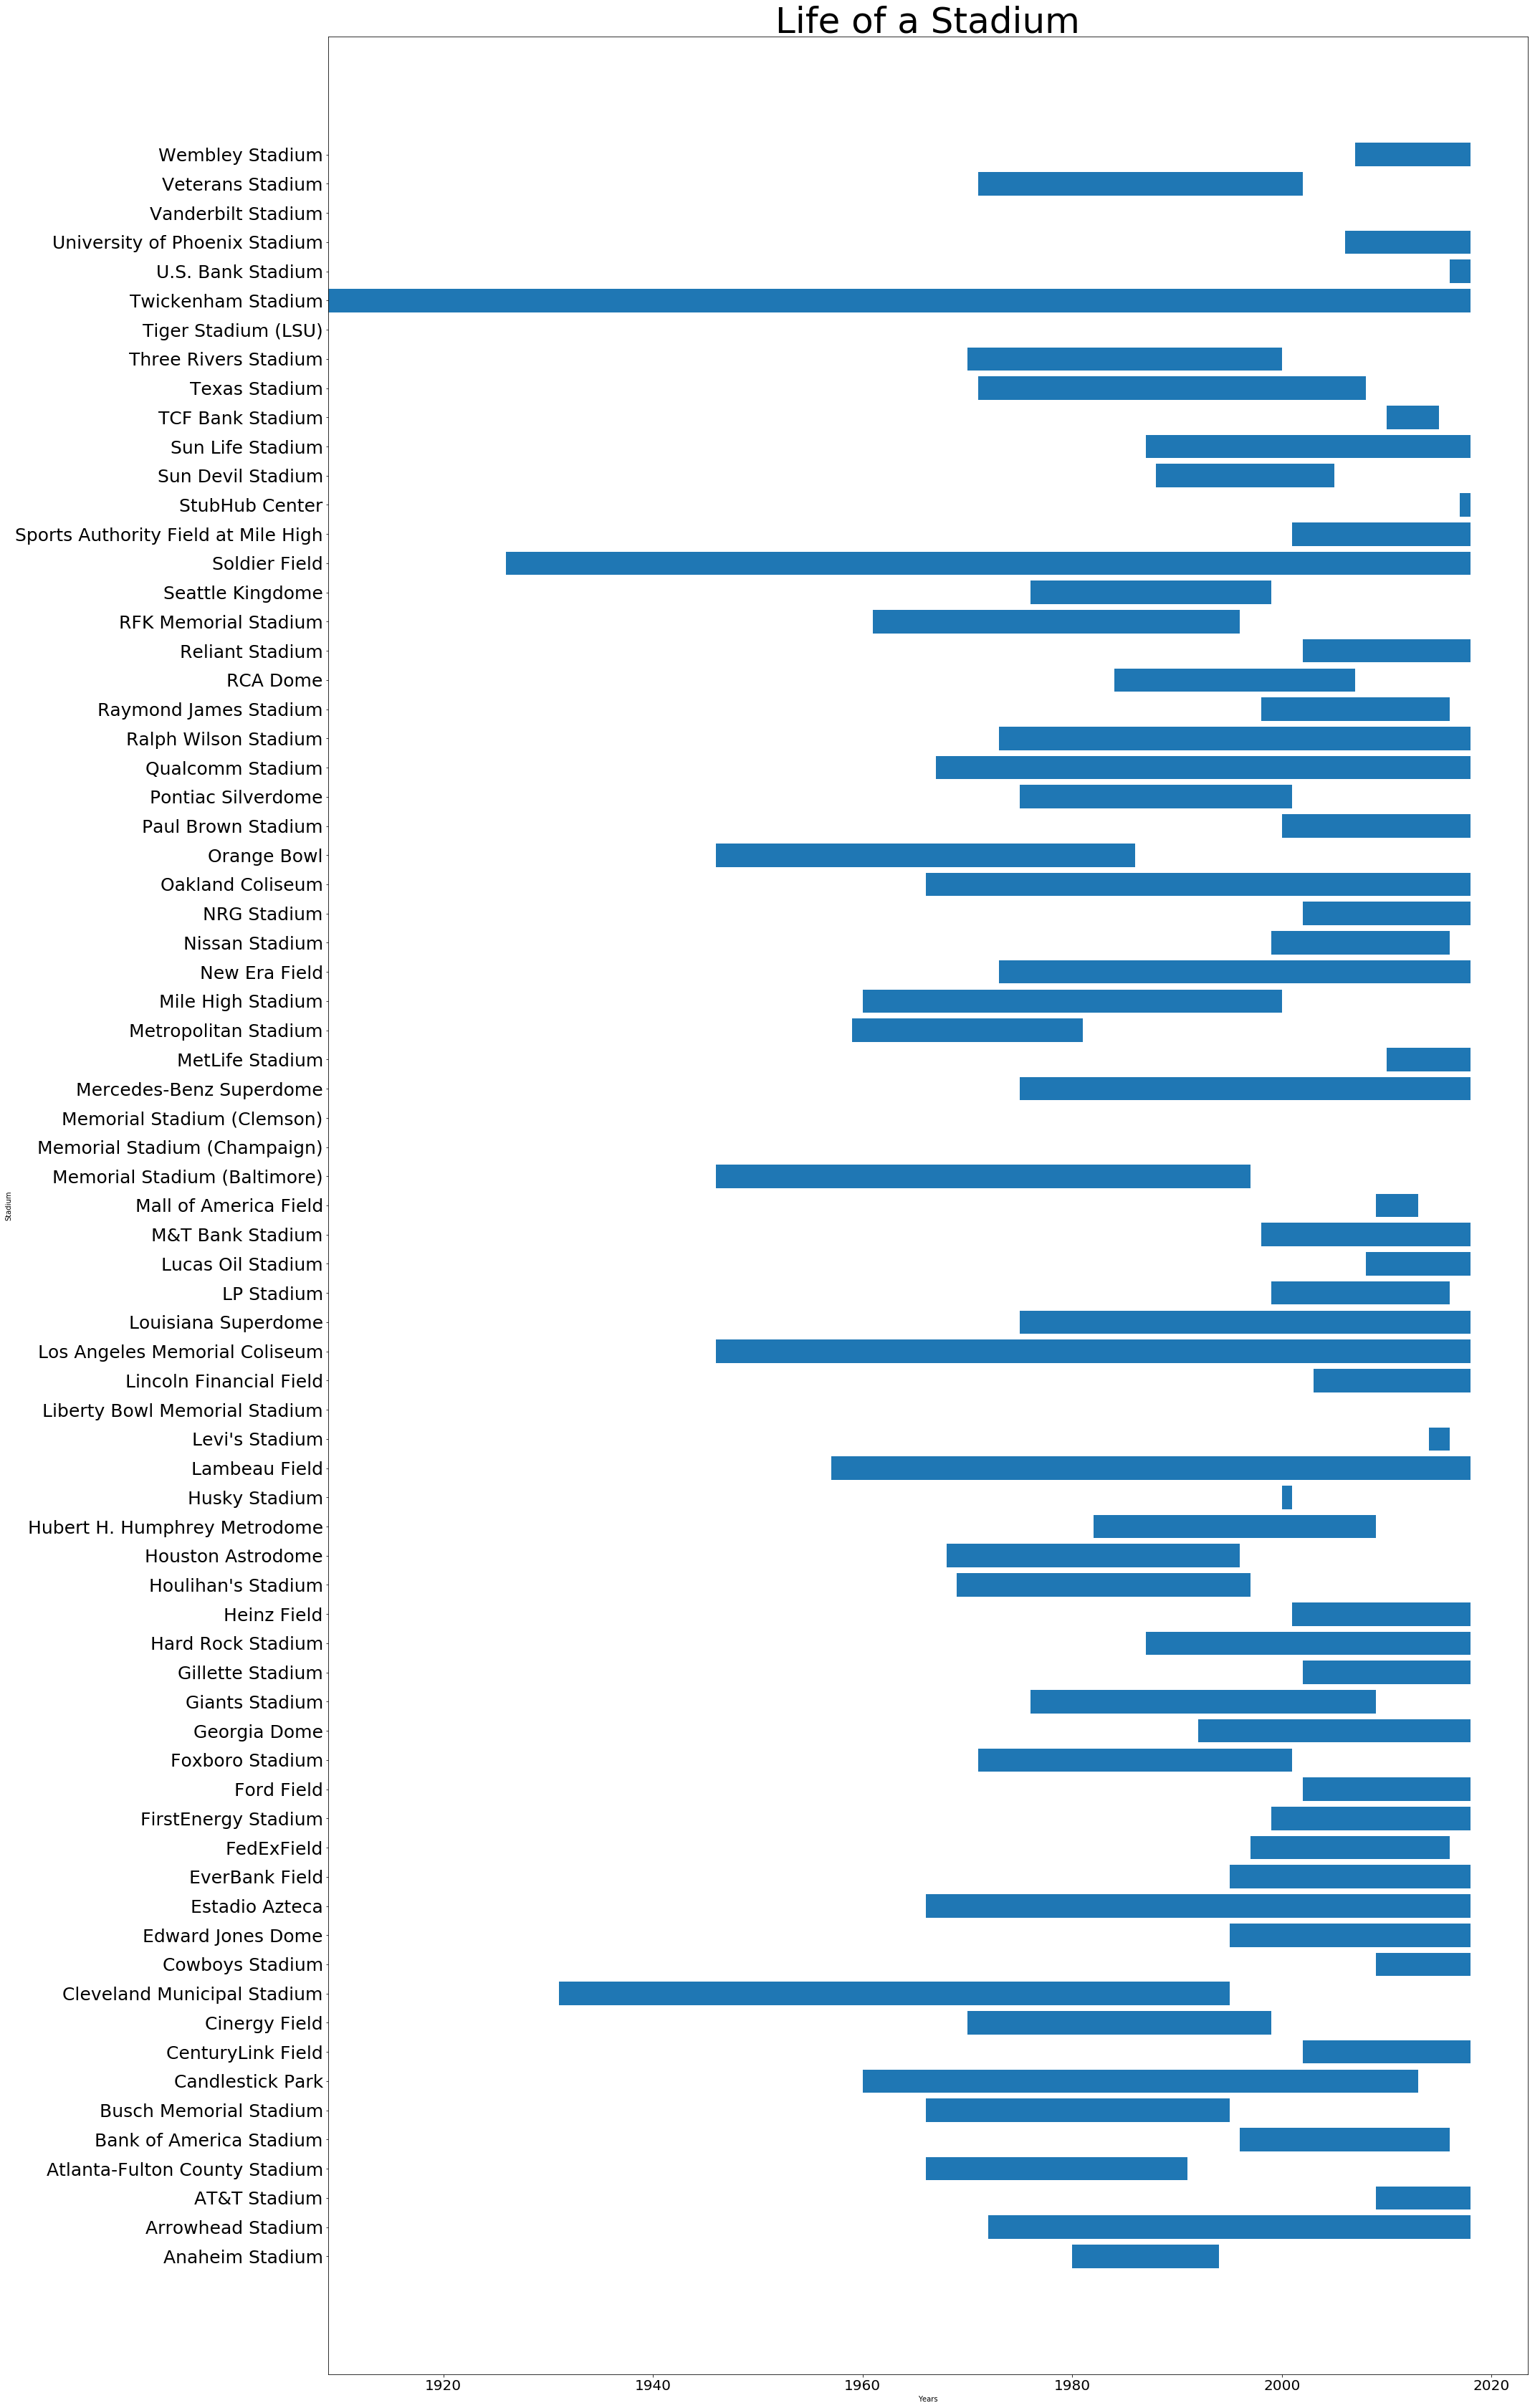

<Figure size 2160x4320 with 0 Axes>

In [54]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
begin = nfl_stadiums.stadium_open.values
end =   nfl_stadiums.stadium_close.values
event = nfl_stadiums.stadium_name.values

plt.barh(range(len(begin)),  end-begin, left=begin)
plt.xticks(fontsize=20)
plt.yticks(range(73), event, fontsize=25)
plt.title("Life of a Stadium", fontsize=50)
plt.xlabel("Years")
plt.ylabel("Stadium")
plt.show()
plt.savefig('LifeofaStadium.png')

In [55]:
print ('Stadium Type -', "Counts")
nfl_stadiums.stadium_weather_type.value_counts()

Stadium Type - Counts


cold        23
moderate    18
dome        18
warm        14
Name: stadium_weather_type, dtype: int64

* Create a visulization of the different stadiums on the map

In [56]:
cl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = nfl_stadiums['LONGITUDE'],
        lat = nfl_stadiums['LATITUDE'],
        text = nfl_stadiums['stadium_name'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            #colorscale = scl,
            cmin = 0,
            #color = 'blue',
            #cmax = df['cnt'].max(),
            #colorbar=dict(
                title="Incoming flightsFebruary 2011"
            )
        )]

layout = dict(
        title = 'Map of all Stadiums in the United States)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='NFL Stadium' )

# Create additional variables that could help with the analysis
* Merged the stadium name and type and included the elevation
* Summarized the weather conditions categorically to take in the wind and weather.
* Calculated a feature that will find the average points you scored and gave up over the past three games to see the 'streakyness' of a time.
* Added a breathing conditions feature and a divisional game feature.
************************************
* Added a ELO metric. ELO metric is awesome tool used by FiveThirtyEight to score a team any given week from 1300-1700. This changes after each game on how they do. Takes into account a lot of different stats. 

#### Merge the stadium information to the games played

In [57]:
nfl_stadiums_small = nfl_stadiums[['stadium_name', 'stadium_type','ELEVATION']]
nfl_stadiums_small.head()

stadium_name stadium_type  ELEVATION
3                Anaheim Stadium      outdoor        0.0
4              Arrowhead Stadium      outdoor      264.9
5                   AT&T Stadium  retractable      163.4
6  Atlanta-Fulton County Stadium      outdoor        0.0
8        Bank of America Stadium      outdoor      221.9

In [58]:
nfl_join = nfl_scores.merge(nfl_stadiums_small, how = 'left', left_on = 'stadium', right_on = 'stadium_name')
nfl_join.head()

schedule_date  schedule_season  schedule_week team_home team_away  \
0    1980-09-07             1980              1       BUF       MIA   
1    1980-09-07             1980              1       CIN        TB   
2    1980-09-07             1980              1        GB       CHI   
3    1980-09-07             1980              1        KC       OAK   
4    1980-09-07             1980              1       LAR       DET   

                stadium team_favorite_id  spread_favorite  over_under_line  \
0  Ralph Wilson Stadium              MIA             -3.0             35.0   
1         Cinergy Field               TB             -1.0             34.0   
2         Lambeau Field              CHI             -6.0             35.0   
3     Arrowhead Stadium               KC             -3.0             42.0   
4       Anaheim Stadium              LAR             -9.0             38.0   

   weather_temperature  weather_wind_mph  score_home  score_away  \
0                 64.0               8.0        17.0         7.0   
1                 72.0               9.0        12.0        17.0   
2                 65.0               5.0        12.0         6.0   
3                 82.0              10.0        14.0        27.0   
4                 66.0              11.0        20.0        41.0   

   stadium_neutral          stadium_name stadium_type  ELEVATION  
0            False  Ralph Wilson Stadium      outdoor      178.0  
1            False         Cinergy Field      outdoor      193.9  
2            False         Lambeau Field      outdoor      209.4  
3            False     Arrowhead Stadium      outdoor      264.9  
4            False       Anaheim Stadium      outdoor        0.0

#### Summarize the weather conditions of a game

In [59]:
conditions = [
    (nfl_join['weather_temperature'] <= 35) & (nfl_join['weather_wind_mph'] >= 15),
    (nfl_join['weather_temperature'] <= 40) & (nfl_join['weather_wind_mph'] >= 10),
    (nfl_join['weather_temperature'] >= 65) & (nfl_join['weather_wind_mph'] <= 5) | (nfl_join['stadium_type']=='indoor')]

choices = ['very poor', 'bad', 'good']

nfl_join['conditions'] = np.select(conditions, choices, default='normal')
nfl_join['conditions'].value_counts()

normal       5941
good         2502
bad           546
very poor     192
Name: conditions, dtype: int64

#### Find the momentum a team has with the average of their points scored/given up over the last 3 games. 

We're building an aggregate team summary of past scores that we'll reference in the larger dataset. First, we have to build the score history. 

In [60]:
all_scores = pd.DataFrame()

all_teams = nfl_join['team_home'].append(nfl_join['team_away'])
unique_teams = list(set(all_teams))

for team in unique_teams: 

    # Pull in all of the scores when the team was the HOME team
    team_home = nfl_join[nfl_join['team_home']==team].groupby(['schedule_season', 'schedule_week'])['score_home', 'score_away'].sum()
    df_home = pd.DataFrame(team_home)
    df_home.reset_index(inplace = True)
    df_home.columns = ['schedule_season','schedule_week','pts_scored','pts_forfeited']

    
    # Pull in all of the scores when the team was the AWAY team
    team_away = nfl_join[nfl_join['team_away']==team].groupby(['schedule_season', 'schedule_week'])['score_away', 'score_home'].sum()
    df_away = pd.DataFrame(team_away)
    df_away.reset_index(inplace = True)
    df_away.columns = ['schedule_season','schedule_week','pts_scored','pts_forfeited']

    # Combine the results into a single dataframe and label the team so we can combine it into the bigger dataframe
    all_team_scores = df_away.append(df_home, sort = True).sort_values(by = ['schedule_season', 'schedule_week'])
    all_team_scores['team'] = [team for i in range(len(all_team_scores))]
    
    # Average the team's points for and points against
    all_team_scores['avg_last_3_for'] = all_team_scores['pts_scored'].rolling(3).mean()
    all_team_scores['avg_last_3_against'] = all_team_scores['pts_forfeited'].rolling(3).mean()
    
    # Combine this team into the bigger dataframe
    if len(all_scores) == 0:
        all_scores = all_team_scores
    else:
        all_scores = all_scores.append(all_team_scores)

all_scores.head(n = 25)

pts_forfeited  pts_scored  schedule_season  schedule_week team  \
0             6.0        12.0             1980              1   GB   
1            29.0         7.0             1980              2   GB   
0            51.0        21.0             1980              3   GB   
2            28.0         7.0             1980              4   GB   
3             9.0        14.0             1980              5   GB   
1            14.0        14.0             1980              6   GB   
2            26.0        21.0             1980              7   GB   
4             3.0        16.0             1980              8   GB   
3            22.0        20.0             1980              9   GB   
5            16.0        23.0             1980             10   GB   
4            27.0        21.0             1980             11   GB   
5            13.0        25.0             1980             12   GB   
6            20.0        17.0             1980             13   GB   
6            61.0         7.0             1980             14   GB   
7            22.0         3.0             1980             15   GB   
7            24.0         3.0             1980             16   GB   
8             9.0        16.0             1981              1   GB   
8            31.0        17.0             1981              2   GB   
9            35.0        23.0             1981              3   GB   
9            30.0        13.0             1981              4   GB   
10           14.0        27.0             1981              5   GB   
10           21.0        10.0             1981              6   GB   
11           13.0         3.0             1981              7   GB   
11           31.0        27.0             1981              8   GB   
12           24.0        34.0             1981              9   GB   

    avg_last_3_for  avg_last_3_against  
0              NaN                 NaN  
1              NaN                 NaN  
0        13.333333           28.666667  
2        11.666667           36.000000  
3        14.000000           29.333333  
1        11.666667           17.000000  
2        16.333333           16.333333  
4        17.000000           14.333333  
3        19.000000           17.000000  
5        19.666667           13.666667  
4        21.333333           21.666667  
5        23.000000           18.666667  
6        21.000000           20.000000  
6        16.333333           31.333333  
7         9.000000           34.333333  
7         4.333333           35.666667  
8         7.333333           18.333333  
8        12.000000           21.333333  
9        18.666667           25.000000  
9        17.666667           32.000000  
10       21.000000           26.333333  
10       16.666667           21.666667  
11       13.333333           16.000000  
11       13.333333           21.666667  
12       21.333333           22.666667

Make sure that each team only has one observation for a given season and week

In [61]:
sanity_check = all_scores.groupby(['schedule_season', 'schedule_week','team']).count()['pts_forfeited']
sanity_check[sanity_check > 1]

Series([], Name: pts_forfeited, dtype: int64)

Good to go! Now, we combine this point information into the main dataframe. First, we'll line up the home team data. 

In [62]:
combined_score_hist = nfl_join.merge(all_scores, how = 'left', 
                      left_on = ['team_home', 'schedule_week', 'schedule_season'], 
                      right_on =['team', 'schedule_week','schedule_season'])

# 1980 Week 3 will be the first week available since we're averaging the last 3 games (even across seasons). 
# Let's view a random week to see how it looks
combined_score_hist[ (combined_score_hist['schedule_week']==4) & (combined_score_hist['schedule_season']==1990) ].head(n = 25)

schedule_date  schedule_season  schedule_week team_home team_away  \
2129    1990-09-30             1990              4       BUF       DEN   
2130    1990-09-30             1990              4       DET        GB   
2131    1990-09-30             1990              4        KC       CLE   
2132    1990-09-30             1990              4       OAK       CHI   
2133    1990-09-30             1990              4       MIN        TB   
2134    1990-09-30             1990              4        NE       NYJ   
2135    1990-09-30             1990              4       NYG       DAL   
2136    1990-09-30             1990              4       PHI       IND   
2137    1990-09-30             1990              4       ARI       WAS   
2138    1990-09-30             1990              4       PIT       MIA   
2139    1990-09-30             1990              4       LAC       TEN   
2140    1990-10-01             1990              4       SEA       CIN   
2147    1990-10-07             1990              4       LAR       CIN   

                            stadium team_favorite_id  spread_favorite  \
2129           Ralph Wilson Stadium              BUF             -3.0   
2130             Pontiac Silverdome              DET             -2.5   
2131              Arrowhead Stadium               KC             -6.5   
2132  Los Angeles Memorial Coliseum              OAK             -1.5   
2133   Hubert H. Humphrey Metrodome              MIN             -8.0   
2134                Foxboro Stadium             PICK              0.0   
2135                 Giants Stadium              NYG            -13.5   
2136               Veterans Stadium              PHI            -13.0   
2137              Sun Devil Stadium              WAS             -6.5   
2138           Three Rivers Stadium              MIA             -2.0   
2139               Qualcomm Stadium              LAC             -2.5   
2140               Seattle Kingdome              CIN             -2.5   
2147                Anaheim Stadium              LAR             -5.0   

      over_under_line  weather_temperature         ...          \
2129             41.0                 58.0         ...           
2130             46.0                 72.0         ...           
2131             36.0                 56.0         ...           
2132             34.0                 68.0         ...           
2133             40.0                 72.0         ...           
2134             40.0                 67.0         ...           
2135             36.0                 69.0         ...           
2136             37.0                 69.0         ...           
2137             37.0                 78.0         ...           
2138             36.0                 62.0         ...           
2139             40.0                 70.0         ...           
2140             43.0                 72.0         ...           
2147             47.0                 68.0         ...           

      stadium_neutral                   stadium_name  stadium_type  ELEVATION  \
2129            False           Ralph Wilson Stadium       outdoor      178.0   
2130            False             Pontiac Silverdome        indoor        0.0   
2131            False              Arrowhead Stadium       outdoor      264.9   
2132            False  Los Angeles Memorial Coliseum       outdoor       29.6   
2133            False   Hubert H. Humphrey Metrodome        indoor        0.0   
2134            False                Foxboro Stadium       outdoor       24.4   
2135            False                 Giants Stadium       outdoor        2.1   
2136            False               Veterans Stadium       outdoor        3.0   
2137            False              Sun Devil Stadium       outdoor      375.2   
2138            False           Three Rivers Stadium       outdoor      366.7   
2139            False               Qualcomm Stadium       outdoor      145.4   
2140            False               Seattle King

Rename the columns to properly identify them. 

In [63]:
combined_score_hist=combined_score_hist.rename(columns = {'avg_last_3_for':'home_last3_scored', 
                                                          'avg_last_3_against':'home_last3_forfeited'})
combined_score_hist.drop(['team', 'pts_forfeited','pts_scored'], axis = 1, inplace = True)

In [64]:
combined_score_hist.head()

schedule_date  schedule_season  schedule_week team_home team_away  \
0    1980-09-07             1980              1       BUF       MIA   
1    1980-09-07             1980              1       CIN        TB   
2    1980-09-07             1980              1        GB       CHI   
3    1980-09-07             1980              1        KC       OAK   
4    1980-09-07             1980              1       LAR       DET   

                stadium team_favorite_id  spread_favorite  over_under_line  \
0  Ralph Wilson Stadium              MIA             -3.0             35.0   
1         Cinergy Field               TB             -1.0             34.0   
2         Lambeau Field              CHI             -6.0             35.0   
3     Arrowhead Stadium               KC             -3.0             42.0   
4       Anaheim Stadium              LAR             -9.0             38.0   

   weather_temperature  weather_wind_mph  score_home  score_away  \
0                 64.0               8.0        17.0         7.0   
1                 72.0               9.0        12.0        17.0   
2                 65.0               5.0        12.0         6.0   
3                 82.0              10.0        14.0        27.0   
4                 66.0              11.0        20.0        41.0   

   stadium_neutral          stadium_name stadium_type  ELEVATION conditions  \
0            False  Ralph Wilson Stadium      outdoor      178.0     normal   
1            False         Cinergy Field      outdoor      193.9     normal   
2            False         Lambeau Field      outdoor      209.4       good   
3            False     Arrowhead Stadium      outdoor      264.9     normal   
4            False       Anaheim Stadium      outdoor        0.0     normal   

   home_last3_scored  home_last3_forfeited  
0                NaN                   NaN  
1                NaN                   NaN  
2                NaN                   NaN  
3                NaN                   NaN  
4                NaN                   NaN

Now, we'll line up the **AWAY** team data.

In [65]:
target_col = 'team_away'
combined_score_hist = combined_score_hist.merge(all_scores, how = 'left', 
                      left_on = [target_col, 'schedule_week', 'schedule_season'], 
                      right_on =['team', 'schedule_week','schedule_season'])

combined_score_hist=combined_score_hist.rename(columns = {'avg_last_3_for':'away_last3_scored', 
                                                          'avg_last_3_against':'away_last3_forfeited'})
combined_score_hist.drop(['team', 'pts_forfeited','pts_scored'], axis = 1, inplace = True)


In [66]:
combined_score_hist.head()

schedule_date  schedule_season  schedule_week team_home team_away  \
0    1980-09-07             1980              1       BUF       MIA   
1    1980-09-07             1980              1       CIN        TB   
2    1980-09-07             1980              1        GB       CHI   
3    1980-09-07             1980              1        KC       OAK   
4    1980-09-07             1980              1       LAR       DET   

                stadium team_favorite_id  spread_favorite  over_under_line  \
0  Ralph Wilson Stadium              MIA             -3.0             35.0   
1         Cinergy Field               TB             -1.0             34.0   
2         Lambeau Field              CHI             -6.0             35.0   
3     Arrowhead Stadium               KC             -3.0             42.0   
4       Anaheim Stadium              LAR             -9.0             38.0   

   weather_temperature          ...           score_away  stadium_neutral  \
0                 64.0          ...                  7.0            False   
1                 72.0          ...                 17.0            False   
2                 65.0          ...                  6.0            False   
3                 82.0          ...                 27.0            False   
4                 66.0          ...                 41.0            False   

           stadium_name  stadium_type ELEVATION conditions  home_last3_scored  \
0  Ralph Wilson Stadium       outdoor     178.0     normal                NaN   
1         Cinergy Field       outdoor     193.9     normal                NaN   
2         Lambeau Field       outdoor     209.4       good                NaN   
3     Arrowhead Stadium       outdoor     264.9     normal                NaN   
4       Anaheim Stadium       outdoor       0.0     normal                NaN   

  home_last3_forfeited  away_last3_scored  away_last3_forfeited  
0                  NaN                NaN                   NaN  
1                  NaN                NaN                   NaN  
2                  NaN                NaN                   NaN  
3                  NaN                NaN                   NaN  
4                  NaN                NaN                   NaN  

[5 rows x 22 columns]

### Add a variable for games that will be played at a high elevation stadium 
Dataset describes the height in meters. 

In [67]:
combined_score_hist.groupby(['stadium_name'])['ELEVATION'].mean().sort_values(ascending = False).head(n = 10)

stadium_name
Mile High Stadium                      1611.2
Sports Authority Field at Mile High    1611.2
Sun Devil Stadium                       375.2
University of Phoenix Stadium           375.2
Heinz Field                             366.7
Three Rivers Stadium                    366.7
TCF Bank Stadium                        265.8
Metropolitan Stadium                    265.8
Arrowhead Stadium                       264.9
Cleveland Municipal Stadium             238.0
Name: ELEVATION, dtype: float64

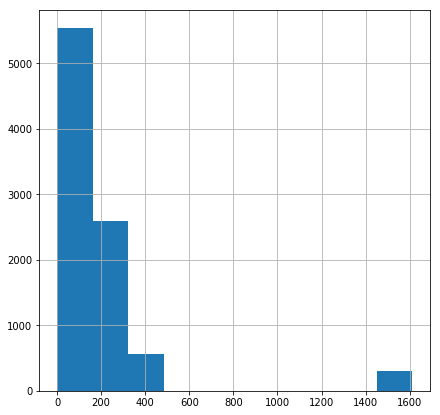

In [68]:
combined_score_hist['ELEVATION'].hist(figsize = (7,7))

Mile high stadium is really the only stadium that is close to affecting breathing levels, so we'll make a column to describe this. 

In [69]:
conditions = [(combined_score_hist['ELEVATION'] >= 1000)]

choices = ['difficult']

combined_score_hist['breathing_cond'] = np.select(conditions, choices, default='normal')
combined_score_hist['breathing_cond'].value_counts()

normal       8875
difficult     306
Name: breathing_cond, dtype: int64

### Add a variable for games that are division games

These games tend to be long dated rivalries as teams play twice a year and only one team from a 4 team division will make it into the post season (excluding the wildcard qualification). Anecdotally, these types of games tend to be closer matchups than one would expect, so it's at least worth flagging these. 

In [70]:
nfl_teams_short = nfl_teams[['team_id', 'team_division', 'team_division_pre2002']]
nfl_teams_short = nfl_teams_short.groupby(['team_id']).ffill().drop_duplicates()
nfl_teams_short['team_id'].value_counts()

ARI    2
TEN    2
IND    2
OAK    2
CAR    1
BAL    1
SF     1
NYJ    1
TB     1
JAX    1
CHI    1
MIA    1
HOU    1
DAL    1
GB     1
SEA    1
CIN    1
NYG    1
KC     1
LAR    1
DEN    1
ATL    1
NO     1
LAC    1
BUF    1
NE     1
MIN    1
CLE    1
PHI    1
WAS    1
DET    1
PIT    1
Name: team_id, dtype: int64

There are some teams that changed divisions multiple times due to the team moving, but our data is only split into the pre-2002 and post-2002 era.

In [71]:
nfl_teams_short

team_id team_division team_division_pre2002
0      ARI      NFC West              NFC West
1      ARI      NFC West              NFC East
3      ATL     NFC South              NFC West
4      BAL     AFC North           AFC Central
5      BUF      AFC East              AFC East
6      CAR     NFC South              NFC West
7      CHI     NFC North           NFC Central
8      CIN     AFC North           AFC Central
9      CLE     AFC North           AFC Central
10     DAL      NFC East              NFC East
11     DEN      AFC West              AFC West
12     DET     NFC North           NFC Central
13      GB     NFC North           NFC Central
14     HOU     AFC South                   NaN
15     IND           NaN              AFC East
16     IND     AFC South              AFC East
17     JAX     AFC South           AFC Central
18      KC      AFC West              AFC West
19     LAC      AFC West              AFC West
21     LAR      NFC West              NFC West
23     MIA      AFC East              AFC East
24     MIN     NFC North           NFC Central
25      NE      AFC East              AFC East
27      NO     NFC South              NFC West
28     NYG      NFC East              NFC East
29     NYJ      AFC East              AFC East
30     OAK           NaN              AFC West
31     OAK      AFC West              AFC West
32     PHI      NFC East              NFC East
33     PIT     AFC North           AFC Central
34     SEA      NFC West              AFC West
35      SF      NFC West              NFC West
36      TB     NFC South           NFC Central
37     TEN           NaN           AFC Central
39     TEN     AFC South           AFC Central
40     WAS      NFC East              NFC East

This took care of most of the divisions, so we can look them up, but the movement of teams still leaves some outcomes that need to be adjusted (eg. ARI for a team that is no longer around). 

In [72]:
nfl_teams_short.drop([0, 15, 30, 37], inplace = True)

In [73]:
nfl_teams_short.set_index('team_id', inplace = True)
nfl_teams_short

team_division team_division_pre2002
team_id                                    
ARI          NFC West              NFC East
ATL         NFC South              NFC West
BAL         AFC North           AFC Central
BUF          AFC East              AFC East
CAR         NFC South              NFC West
CHI         NFC North           NFC Central
CIN         AFC North           AFC Central
CLE         AFC North           AFC Central
DAL          NFC East              NFC East
DEN          AFC West              AFC West
DET         NFC North           NFC Central
GB          NFC North           NFC Central
HOU         AFC South                   NaN
IND         AFC South              AFC East
JAX         AFC South           AFC Central
KC           AFC West              AFC West
LAC          AFC West              AFC West
LAR          NFC West              NFC West
MIA          AFC East              AFC East
MIN         NFC North           NFC Central
NE           AFC East              AFC East
NO          NFC South              NFC West
NYG          NFC East              NFC East
NYJ          AFC East              AFC East
OAK          AFC West              AFC West
PHI          NFC East              NFC East
PIT         AFC North           AFC Central
SEA          NFC West              AFC West
SF           NFC West              NFC West
TB          NFC South           NFC Central
TEN         AFC South           AFC Central
WAS          NFC East              NFC East

In [74]:
# Simple function to make the list comprehension easier to read
def find_division(df, team, year):
    if int(year) < 2002: 
        div = df.loc[team,'team_division_pre2002']
    else: 
        div = df.loc[team,'team_division']
    return div 

combined_score_hist['home_division'] = [find_division(nfl_teams_short, team, year) for team, year in 
                                        zip(combined_score_hist['team_home'], combined_score_hist['schedule_season'])]


combined_score_hist['away_division'] = [find_division(nfl_teams_short, team, year) for team, year in 
                                        zip(combined_score_hist['team_away'], combined_score_hist['schedule_season'])]


combined_score_hist['rivalry'] = ['Y' if h == a else 'N' for h, a in 
                                  zip(combined_score_hist['home_division'], combined_score_hist['away_division'])]

combined_score_hist['rivalry'].value_counts()

N    5245
Y    3936
Name: rivalry, dtype: int64

In [75]:
# To reduce the size of the dataset, we can eliminate the division names 
combined_score_hist.drop(['home_division', 'away_division', 'stadium_name','stadium','ELEVATION'], axis = 1, inplace = True)

In [76]:
combined_score_hist.head()

schedule_date  schedule_season  schedule_week team_home team_away  \
0    1980-09-07             1980              1       BUF       MIA   
1    1980-09-07             1980              1       CIN        TB   
2    1980-09-07             1980              1        GB       CHI   
3    1980-09-07             1980              1        KC       OAK   
4    1980-09-07             1980              1       LAR       DET   

  team_favorite_id  spread_favorite  over_under_line  weather_temperature  \
0              MIA             -3.0             35.0                 64.0   
1               TB             -1.0             34.0                 72.0   
2              CHI             -6.0             35.0                 65.0   
3               KC             -3.0             42.0                 82.0   
4              LAR             -9.0             38.0                 66.0   

   weather_wind_mph   ...    score_away  stadium_neutral  stadium_type  \
0               8.0   ...           7.0            False       outdoor   
1               9.0   ...          17.0            False       outdoor   
2               5.0   ...           6.0            False       outdoor   
3              10.0   ...          27.0            False       outdoor   
4              11.0   ...          41.0            False       outdoor   

  conditions home_last3_scored  home_last3_forfeited  away_last3_scored  \
0     normal               NaN                   NaN                NaN   
1     normal               NaN                   NaN                NaN   
2       good               NaN                   NaN                NaN   
3     normal               NaN                   NaN                NaN   
4     normal               NaN                   NaN                NaN   

   away_last3_forfeited  breathing_cond rivalry  
0                   NaN          normal       Y  
1                   NaN          normal       N  
2                   NaN          normal       Y  
3                   NaN          normal       Y  
4                   NaN          normal       N  

[5 rows x 21 columns]

### Additional Dataset: Elo Ratings from FiveThirtyEight on NFL teams

This will help us get an idea of the relative strengths of teams outside of the scores in recent games. This is a fun description of the methodology where they admit its limitations, but this data supplements what we have available and is worth trying in our model as they consider additional elements like strength of schedule for a team. 

https://fivethirtyeight.com/features/introducing-nfl-elo-ratings/

In [77]:
#nfl_elo_path = 'C:\\Users\\Pete Russell\\Desktop\\I526_AML_FA18\\Final Project\\nfl_elo_test.csv'

nfl_elo = pd.read_csv('../nfl-scores-and-betting-data/nfl_elo.csv')

nfl_elo['date'] = pd.to_datetime(nfl_elo['date'])
nfl_elo.head()

date  season  neutral playoff team1 team2  elo1_pre  elo2_pre  \
0 1920-09-26    1920        0     NaN   RII   STP  1503.947  1300.000   
1 1920-10-03    1920        0     NaN   BFF   WBU  1478.004  1300.000   
2 1920-10-03    1920        0     NaN   CBD   PTQ  1504.688  1300.000   
3 1920-10-03    1920        0     NaN   CHI   MUT  1368.333  1300.000   
4 1920-10-03    1920        0     NaN   RII   MUN  1516.108  1478.004   

   elo_prob1  elo_prob2  elo1_post  elo2_post  score1  score2  
0   0.824651   0.175349   1516.108   1287.838    48.0     0.0  
1   0.802000   0.198000   1489.757   1288.247    32.0     6.0  
2   0.825267   0.174733   1516.803   1287.885    48.0     0.0  
3   0.682986   0.317014   1386.533   1281.800    20.0     0.0  
4   0.644171   0.355829   1542.135   1451.977    45.0     0.0

Merge this data into our main dataset...

In [78]:
nfl_elo_small = nfl_elo[['date', 'team1', 'team2', 'elo1_pre','elo2_pre']]

elo_merge = combined_score_hist.merge(nfl_elo_small, how = 'left', left_on = ['schedule_date', 'team_home'], right_on = ['date','team1'])
elo_merge.drop(['date','team1', 'team2'], axis = 1, inplace = True)
elo_merge['diff'] = elo_merge['elo1_pre'] - elo_merge['elo2_pre']
elo_merge.head()

schedule_date  schedule_season  schedule_week team_home team_away  \
0    1980-09-07             1980              1       BUF       MIA   
1    1980-09-07             1980              1       CIN        TB   
2    1980-09-07             1980              1        GB       CHI   
3    1980-09-07             1980              1        KC       OAK   
4    1980-09-07             1980              1       LAR       DET   

  team_favorite_id  spread_favorite  over_under_line  weather_temperature  \
0              MIA             -3.0             35.0                 64.0   
1               TB             -1.0             34.0                 72.0   
2              CHI             -6.0             35.0                 65.0   
3               KC             -3.0             42.0                 82.0   
4              LAR             -9.0             38.0                 66.0   

   weather_wind_mph   ...     conditions  home_last3_scored  \
0               8.0   ...         normal                NaN   
1               9.0   ...         normal                NaN   
2               5.0   ...           good                NaN   
3              10.0   ...         normal                NaN   
4              11.0   ...         normal                NaN   

   home_last3_forfeited away_last3_scored away_last3_forfeited  \
0                   NaN               NaN                  NaN   
1                   NaN               NaN                  NaN   
2                   NaN               NaN                  NaN   
3                   NaN               NaN                  NaN   
4                   NaN               NaN                  NaN   

   breathing_cond  rivalry  elo1_pre  elo2_pre     diff  
0          normal        Y  1465.161  1546.464  -81.303  
1          normal        N  1470.732  1460.770    9.962  
2          normal        Y  1428.338  1516.573  -88.235  
3          normal        Y  1471.194  1546.315  -75.121  
4          normal        N  1536.751  1380.659  156.092  

[5 rows x 24 columns]

For the Elo ratings, they say each team is benchmarked against 1500, so we would expect the difference between two teams to be hovered around zero, which it appears to be. 

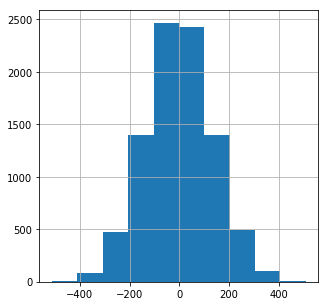

In [79]:
elo_merge['diff'].hist(figsize = (5,5))

#### Dataset is prepped and ready for testing!

# Create Target Variable
**This creates the target variable of what we will be calculating. We are baseing this on the home team and how the differential between the scores is. Also the target will the column favorite beat the spread by. **

In [80]:
#y=nfl_scores["score_home"]-nfl_scores["score_away"]


In [81]:
# Function determines if home or away team is favorite and returns how much the favorite won by
def calc_favorite_won_by (row):
    # Favored team played at home
    if re.search(row['team_favorite_id'], row['team_home'], re.IGNORECASE):
        return row['score_home']-row['score_away']
    else:
        return row['score_away']-row['score_home']

# Function determines if home or away team is favorite and returns how much the favorite beat spread by
def calc_favorite_beat_spread_by (row):
    return row['spread_favorite']+row['favorite_won_by']    
    
# Populate new columns with how much the favorite won by and how much the favorite beat spread by
nfl_scores['favorite_won_by']=nfl_scores.apply(lambda row: calc_favorite_won_by(row),axis=1)
nfl_scores['favorite_beat_spread_by']=nfl_scores.apply(lambda row: calc_favorite_beat_spread_by(row),axis=1)
y=nfl_scores['favorite_beat_spread_by']
nfl_scores.head()

schedule_date  schedule_season  schedule_week team_home team_away  \
2734    1980-09-07             1980              1       BUF       MIA   
2735    1980-09-07             1980              1       CIN        TB   
2736    1980-09-07             1980              1        GB       CHI   
2737    1980-09-07             1980              1        KC       OAK   
2738    1980-09-07             1980              1       LAR       DET   

                   stadium team_favorite_id  spread_favorite  over_under_line  \
2734  Ralph Wilson Stadium              MIA             -3.0             35.0   
2735         Cinergy Field               TB             -1.0             34.0   
2736         Lambeau Field              CHI             -6.0             35.0   
2737     Arrowhead Stadium               KC             -3.0             42.0   
2738       Anaheim Stadium              LAR             -9.0             38.0   

      weather_temperature  weather_wind_mph  score_home  score_away  \
2734                 64.0               8.0        17.0         7.0   
2735                 72.0               9.0        12.0        17.0   
2736                 65.0               5.0        12.0         6.0   
2737                 82.0              10.0        14.0        27.0   
2738                 66.0              11.0        20.0        41.0   

      stadium_neutral  favorite_won_by  favorite_beat_spread_by  
2734            False            -10.0                    -13.0  
2735            False              5.0                      4.0  
2736            False             -6.0                    -12.0  
2737            False            -13.0                    -16.0  
2738            False            -21.0                    -30.0

# Machine Learning

In [82]:
X_train, X_other, y_train, y_other=train_test_split(elo_merge,y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val=train_test_split(X_other,y_other, test_size=0.5, random_state=42)

## Numerical and Categorical Pipelines

* Identify Numerical and categorical attributes of the new data set

In [83]:
num_attribs=[ 
        'spread_favorite', 'over_under_line',
       'weather_temperature', 'weather_wind_mph', 'score_home', 'score_away','elo1_pre', 'elo2_pre', 'diff',
        'home_last3_scored','schedule_season','schedule_week',
       'home_last3_forfeited', 'away_last3_scored', 'away_last3_forfeited']
cat_attribs=['team_home', 'team_away','team_favorite_id','stadium_neutral',
            'breathing_cond', 'rivalry','stadium_type']


* Create Pipeline for the numerical features. This pipeline will include a dataframe selector for the numerical attributes  and will also impute the NA values and standardize the data
* Create a pipeline for categorical values that will select the categorical attributes from the dataframe, impute the NA values and also perform OneHotEncoding
* Create a union of the two pipelines

In [84]:
pca = PCA(n_components=40)
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
pca_pipe = Pipeline([
    ("preparation", full_pipeline),
    ("pca",pca)
])

## Dummy Regressor

This is the baseline where all testing will be done against

In [85]:
model = DummyRegressor(strategy='mean')
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
baseline_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
baseline_train_score = np.sqrt(-baseline_scores.mean())

start = time()
model.fit(X_train, y_train)
baseline_train_predict = model.fit(X_train, y_train)
train_time_bs = np.round(time()-start,3)

start = time()
baseline_test_predict = model.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)

results = pd.DataFrame(columns=["ExpID", "Test Error", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])

results.loc[0] = ['Baseline', baseline_test_score, "--", train_time_bs, test_time, "--"]

## XGBoost Regressor with PCA

In [86]:
x_train = pca_pipe.fit_transform(X_train)
x_test = pca_pipe.fit_transform(X_test)

data_matrix = xgb.DMatrix(x_train,y_train.values)
start = time()
xg_reg = xgb.XGBRegressor(objective ='reg:linear',booster='dart',colsample_bytree = 0.2, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50)
xg_reg.fit(x_train,y_train)
train_time = np.round(time()-start,2)

start = time()
preds = xg_reg.predict(x_test)
test_time = np.round(time()-start,2)

In [87]:
params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.1,
                'max_depth': 5, 'lambda': 10}

In [88]:
cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics=["rmse"], as_pandas=True, seed=42)

[06:57:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[06:57:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[06:57:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[06:57:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[06:57:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[06:57:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[06:57:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[06:57:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[06:57:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[06:57:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[06:57:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[06:57:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[06:57:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[06:57:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[06:57:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[06:57:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[06:57:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[06:57:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[06:57:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[06:57:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[06:57:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[06:57:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[06:57:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[06:57:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[06:57:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[06:57:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[06:57:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [89]:
cv_results

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         13.283348        0.029630       13.334036       0.256225
1         13.008010        0.182255       13.102257       0.293728
2         12.745911        0.208135       12.888218       0.319501
3         12.589944        0.185734       12.770886       0.341496
4         12.397077        0.233934       12.612828       0.333778
5         12.183832        0.216687       12.446692       0.365656
6         11.997792        0.173321       12.298178       0.327631
7         11.773163        0.166232       12.107797       0.341114
8         11.608958        0.184920       11.980443       0.252248
9         11.450795        0.249682       11.851030       0.260595
10        11.260217        0.233040       11.695564       0.279327
11        11.113510        0.234078       11.586862       0.276305
12        11.027153        0.217150       11.532369       0.265717
13        10.902644        0.252292       11.434418       0.289735
14        10.734859        0.223618       11.300118       0.280974
15        10.546215        0.241347       11.143603       0.273345
16        10.408619        0.201635       11.038071       0.238546
17        10.287344        0.211473       10.944365       0.247031
18        10.155100        0.216605       10.839695       0.275179
19        10.034097        0.192951       10.755090       0.271458
20         9.960988        0.182596       10.708768       0.274890
21         9.825624        0.154110       10.599075       0.225142
22         9.727275        0.147345       10.524428       0.217188
23         9.658257        0.165019       10.482641       0.199333
24         9.551524        0.147381       10.400361       0.204502
25         9.453560        0.153537       10.326224       0.231694
26         9.374072        0.157549       10.273661       0.240397
27         9.295494        0.157294       10.221748       0.221858
28         9.247859        0.149700       10.193187       0.237482
29         9.174662        0.135131       10.140612       0.240845
30         9.098637        0.150282       10.083738       0.240260
31         9.042806        0.157022       10.047186       0.245975
32         8.985262        0.148689       10.010611       0.249296
33         8.911633        0.158863        9.954142       0.259770
34         8.862830        0.156888        9.932050       0.258937
35         8.814202        0.158537        9.904256       0.264667
36         8.757191        0.153764        9.869218       0.272998
37         8.707241        0.146042        9.835553       0.260121
38         8.641766        0.131944        9.783691       0.263067
39         8.591880        0.127030        9.749030       0.264802
40         8.555187        0.137299        9.731962       0.269248
41         8.505339        0.128227        9.700930       0.262050
42         8.461577        0.122545        9.677056       0.264197
43         8.422591        0.121398        9.655109       0.257773
44         8.386020        0.121968        9.634524       0.271324
45         8.348073        0.118063        9.612142       0.272499
46         8.303290        0.115887        9.585987       0.284138
47         8.260382        0.121145        9.561484       0.289726
48         8.221628        0.120065        9.537209       0.293890
49         8.179750        0.119751        9.506486       0.306503

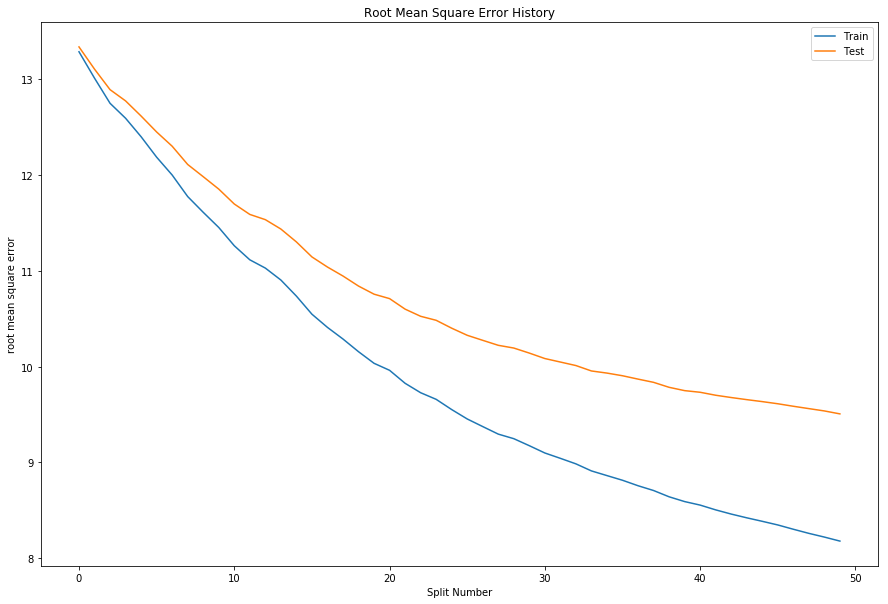

In [90]:
plt.figure(figsize=(15, 10))
plt.plot(cv_results["train-rmse-mean"], label="Train")
plt.plot(cv_results["test-rmse-mean"], label="Test")
plt.ylabel('root mean square error')
plt.xlabel("Split Number")
plt.title("Root Mean Square Error History")
plt.legend();


In [91]:
cv_results.tail(1)

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
49          8.17975        0.119751        9.506486       0.306503

In [92]:
frame  = np.round(pd.DataFrame(cv_results.mean()).T,2)
frame

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0             9.94            0.17           10.74           0.27

In [93]:
train_rmse_mean = float(frame["train-rmse-mean"])
train_rmse_std = float(frame["train-rmse-std"])

test_rmse_mean = float(frame["test-rmse-mean"])
test_rmse_std = float(frame["test-rmse-std"])

In [94]:
xg_reg = xgb.train(params=params, dtrain=data_matrix, num_boost_round=10)

[06:57:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[06:57:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[06:57:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[06:57:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

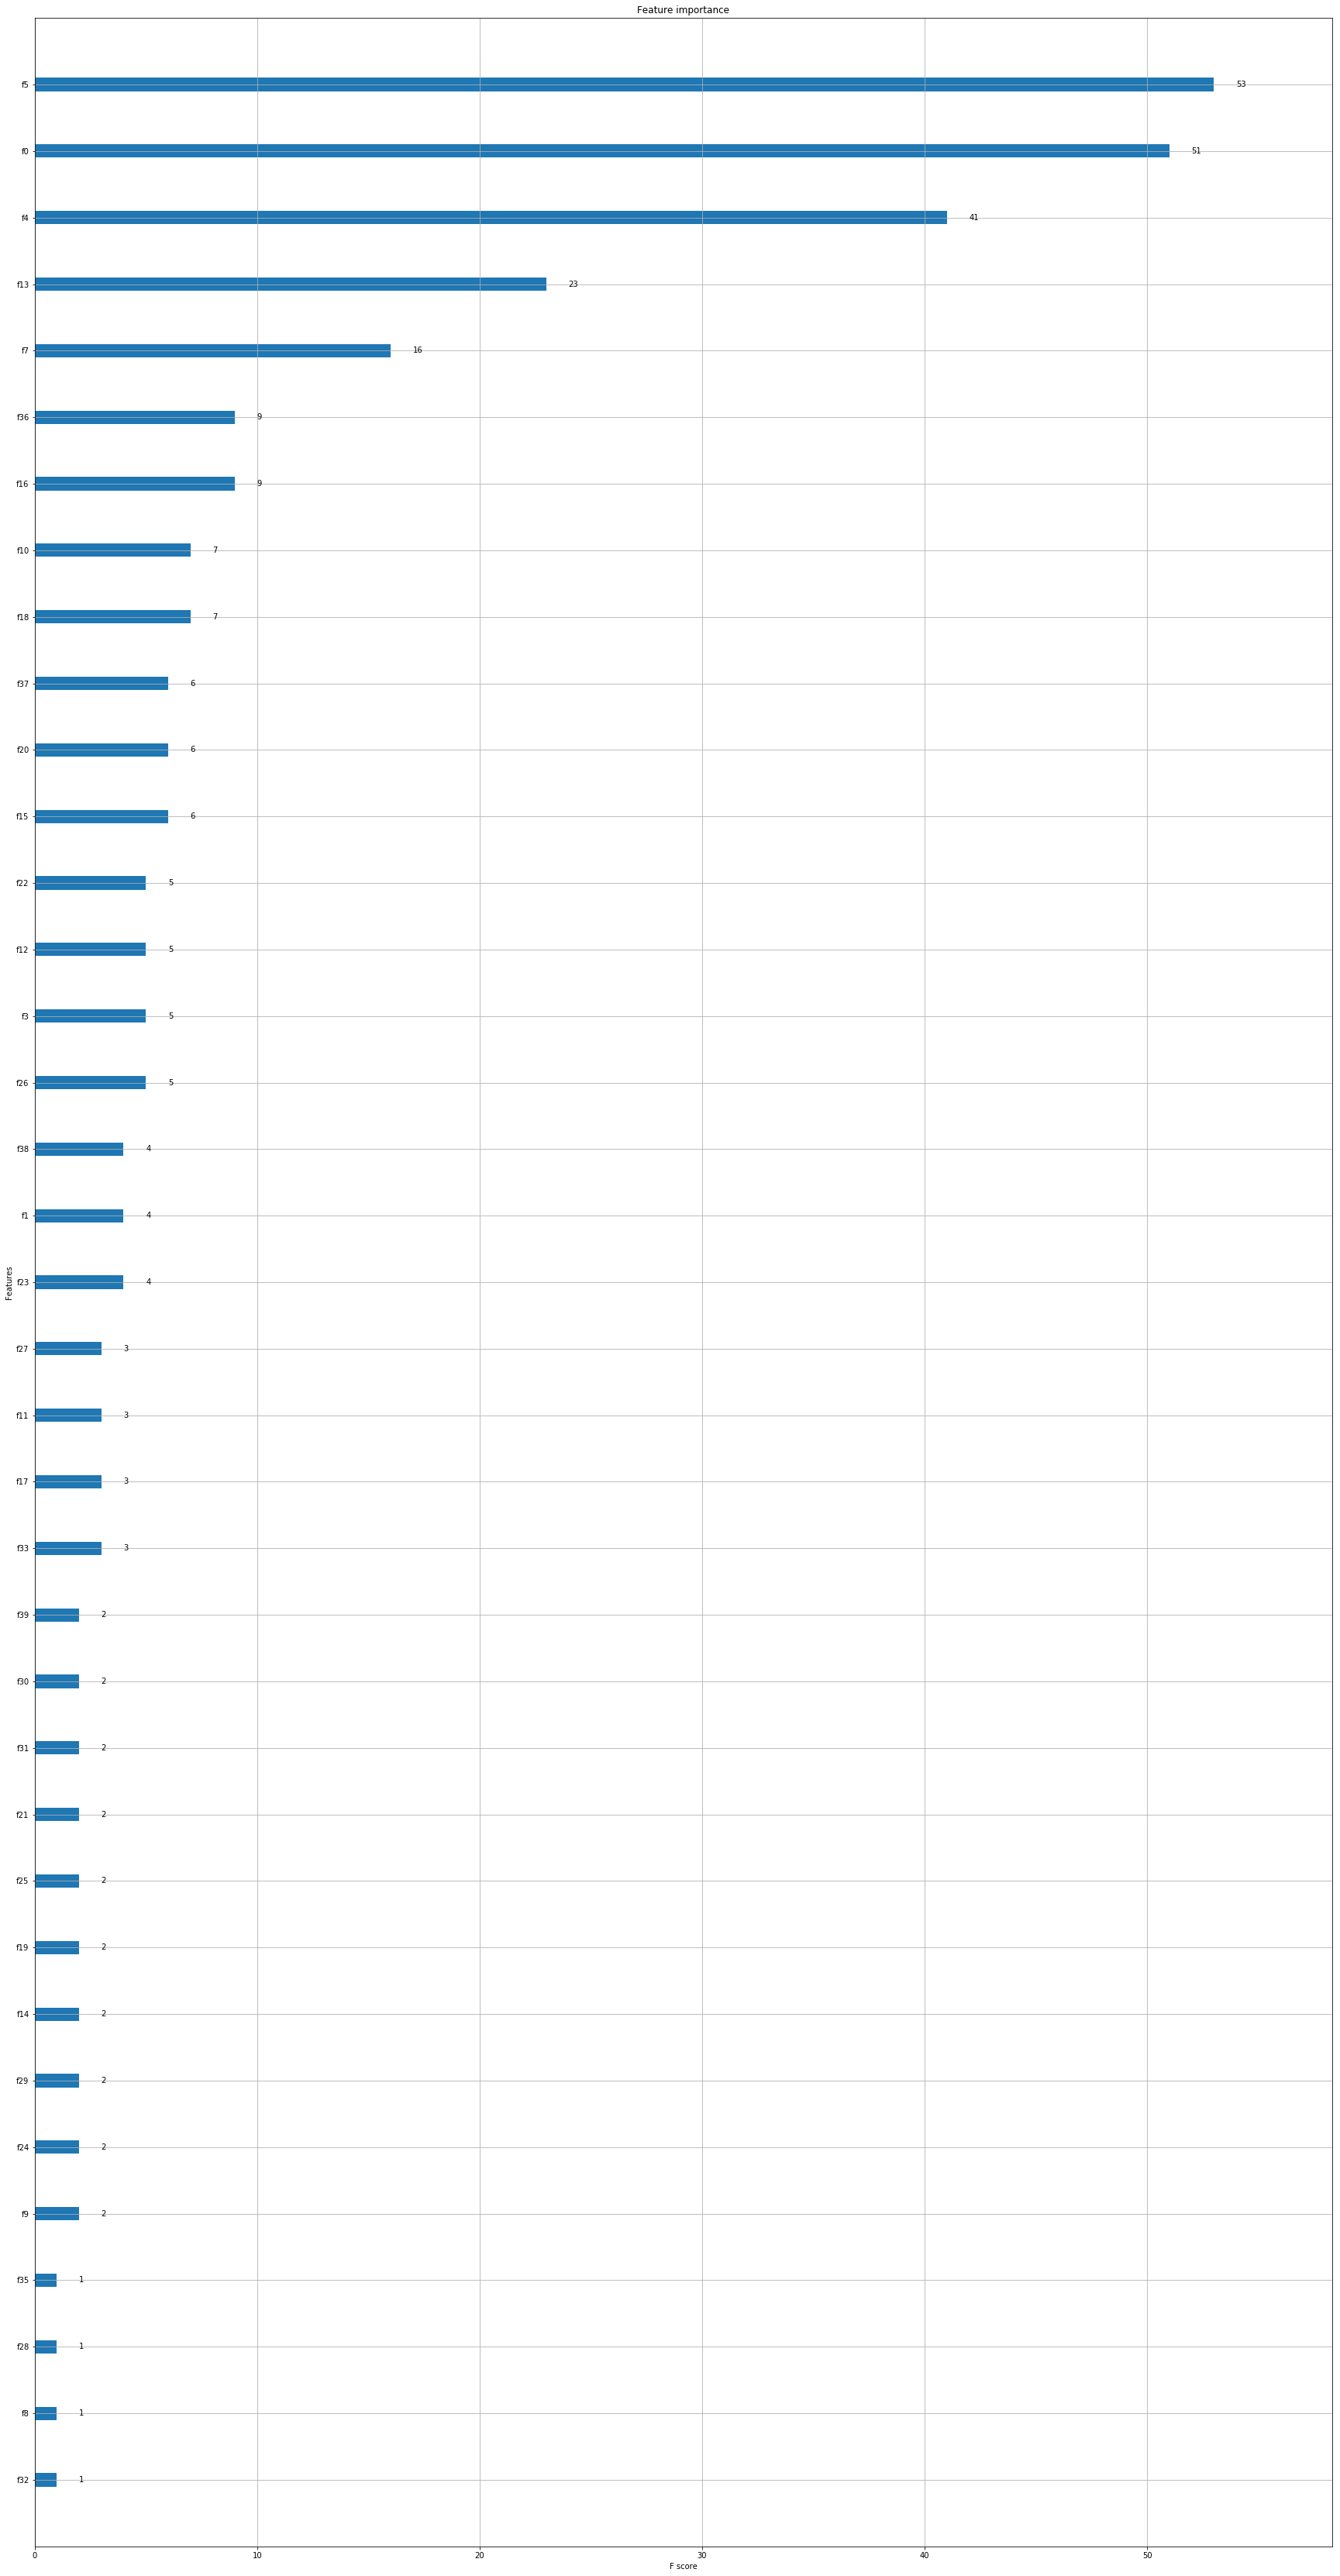

In [95]:
xgb.plot_importance(xg_reg,height=0.2)
plt.rcParams['figure.figsize'] = [15, 10]

The encoded dataset contains 179 variables which is fairly large. Dimension Reduction reduction techniques in machine learning provide a concise method of compressing the dimensions of the dataset based on similarity. This fastens computation time and takes care of multi-collinearity that helps improve performance. The plot above shows the forty features that were selected based on importance (F-scores) after principal component analysis was performed.

In [96]:
results.loc[len(results)]=["XGBoostRegressor", test_rmse_mean, "--", train_time, test_time, "Non-Optimized XGBoost"]

In [97]:
results

ExpID  Test Error p-value  Train Time(s)  Test Time(s)  \
0          Baseline   13.288037      --            0.0           0.0   
1  XGBoostRegressor   10.740000      --            1.3           0.0   

  Experiment description  
0                     --  
1  Non-Optimized XGBoost

In [98]:
# A Function to execute the grid search and record the results.
fit_params = {"eval_set": [(X_test, y_test)], 
              "early_stopping_rounds": 10, 
              "verbose": False} 
def ConductGridSearch(X_train, y_train, X_test, y_test, i=0, prefix=''):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('Linear Regression', LinearRegression(n_jobs=-1)),
        ('K-Nearest Neighbors', KNeighborsRegressor()),
        #('Logistic Regression', LogisticRegression()),
        ('Stochastic GD', SGDRegressor(max_iter=1500)),
        ('RandomForest', RandomForestRegressor()),
        ('XGBoost', XGBRegressor(fit_params=fit_params,objective ='reg:linear'))
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'Linear Regression': {
            'normalize': (True, False)
        },
        'K-Nearest Neighbors': {
            'n_neighbors': (1,5,7, 8, 11,13,15,17,20,22),
            'weights':('distance','uniform'),
            'p': (1,2),
        },
        #'Logistic Regression' : {
         #   'penalty': ('l1', 'l2'),     
          #  'C': (10, 1, 0.1, 0.01,.001),
        #,
        'XGBoost':{
            "n_estimators": [10, 50, 100, 500],
            "learning_rate": [0.1,0.01,0.001],
            'max_depth': [3,5, 6],
            'booster': ('dart',"gblinear")
        },
        'Stochastic GD': {
            'loss': ('squared_loss', 'huber', 'squared_epsilon_insensitive'),
            'penalty': ('l1', 'l2', 'elasticnet'),
            'tol': (0.0001, 0.00001, 0.0000001), 
            'alpha': (0.1, 0.01, 0.001, 0.0001), 
        },
        'RandomForest':  {
            'max_depth': [1,3,5,6,9, 15, 22, 26, 30],
            'max_features': [1, 3, 5],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [3, 5, 10],
            'n_estimators':[20, 80, 150, 200, 300]},
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
        ("preparation", pca_pipe),
        ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
            
        grid_search = GridSearchCV(full_pipeline_with_predictor,params, scoring='neg_mean_squared_error',cv=5, verbose=1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)

        # Generate 30 training accuracy scores with the best estimator and 30-split CV
        best_train_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=cv)
        best_train_accuracy = (best_train_scores.mean())

        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(baseline_scores, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        results.loc[i] = [prefix+name, np.sqrt(best_test_accuracy), round(p_value,3), train_time, test_time, json.dumps(param_dump)]

## GridSearchCV

In [99]:
#results = pd.DataFrame(columns=["ExpID", "Train Accuracy (Mean)", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])

ConductGridSearch(X_train, y_train, X_test, y_test, 0, "Best Model:")

****** START Best Model: Linear Regression *****
Parameters:
	normalize: (True, False)
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s finished


Best Parameters:
	predictor__normalize: True
****** FINISH Best Model: Linear Regression  *****

****** START Best Model: K-Nearest Neighbors *****
Parameters:
	n_neighbors: (1, 5, 7, 8, 11, 13, 15, 17, 20, 22)
	p: (1, 2)
	weights: ('distance', 'uniform')
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  8.8min finished


Best Parameters:
	predictor__n_neighbors: 17
	predictor__p: 2
	predictor__weights: distance
****** FINISH Best Model: K-Nearest Neighbors  *****

****** START Best Model: Stochastic GD *****
Parameters:
	alpha: (0.1, 0.01, 0.001, 0.0001)
	loss: ('squared_loss', 'huber', 'squared_epsilon_insensitive')
	penalty: ('l1', 'l2', 'elasticnet')
	tol: (0.0001, 1e-05, 1e-07)
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\shiva\AppData\Local\conda\conda\envs\AML\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\shiva\AppData\Local\conda\conda\envs\AML\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\shiva\AppData\Local\conda\conda\envs\AML\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\shiva\AppData\Local\conda\conda\envs\AML\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning:

Maximum number of iteration reached before co

Best Parameters:
	predictor__alpha: 0.1
	predictor__loss: squared_loss
	predictor__penalty: l1
	predictor__tol: 1e-07
****** FINISH Best Model: Stochastic GD  *****

****** START Best Model: RandomForest *****
Parameters:
	max_depth: [1, 3, 5, 6, 9, 15, 22, 26, 30]
	max_features: [1, 3, 5]
	min_samples_leaf: [3, 5, 10]
	min_samples_split: [5, 10, 15]
	n_estimators: [20, 80, 150, 200, 300]
Fitting 5 folds for each of 1215 candidates, totalling 6075 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6075 out of 6075 | elapsed: 170.0min finished


Best Parameters:
	predictor__max_depth: 30
	predictor__max_features: 5
	predictor__min_samples_leaf: 3
	predictor__min_samples_split: 5
	predictor__n_estimators: 150
****** FINISH Best Model: RandomForest  *****

****** START Best Model: XGBoost *****
Parameters:
	booster: ('dart', 'gblinear')
	learning_rate: [0.1, 0.01, 0.001]
	max_depth: [3, 5, 6]
	n_estimators: [10, 50, 100, 500]
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 43.8min finished


Best Parameters:
	predictor__booster: dart
	predictor__learning_rate: 0.1
	predictor__max_depth: 6
	predictor__n_estimators: 500
****** FINISH Best Model: XGBoost  *****



# Results

The Results table is showing the results of the gridsearch. The gridsearch found that the Stochastic GD was the best at predicting a value just 3.47 points away from its target.
This is incredible good as the baseline was 13.28 points.

**BEST PREDICTION**
Parameters:
	alpha: (0.1, 0.01, 0.001, 0.0001)
	loss: ('squared_loss', 'huber', 'squared_epsilon_insensitive')
	penalty: ('l1', 'l2', 'elasticnet')
	tol: (0.0001, 1e-05, 1e-07)
Fitting 5 folds for each of 108 candidates, totalling 540 fits

In [100]:
results

ExpID  Test Error p-value  Train Time(s)  \
0                        Baseline   13.288037      --         0.0000   
1    Best Model:Linear Regression    3.605551       0         0.3401   
2  Best Model:K-Nearest Neighbors    6.826419       0         0.2832   
3        Best Model:Stochastic GD    3.478505       0         0.2563   
4         Best Model:RandomForest    6.663332       0         5.0295   
5              Best Model:XGBoost    7.694154       0        87.5718   

   Test Time(s)                             Experiment description  
0        0.0000                                                 --  
1        0.0110                   [["predictor__normalize", true]]  
2        0.3979  [["predictor__n_neighbors", 17], ["predictor__...  
3        0.0060  [["predictor__alpha", 0.1], ["predictor__loss"...  
4        0.0369  [["predictor__max_depth", 30], ["predictor__ma...  
5        0.0419  [["predictor__booster", "dart"], ["predictor__...

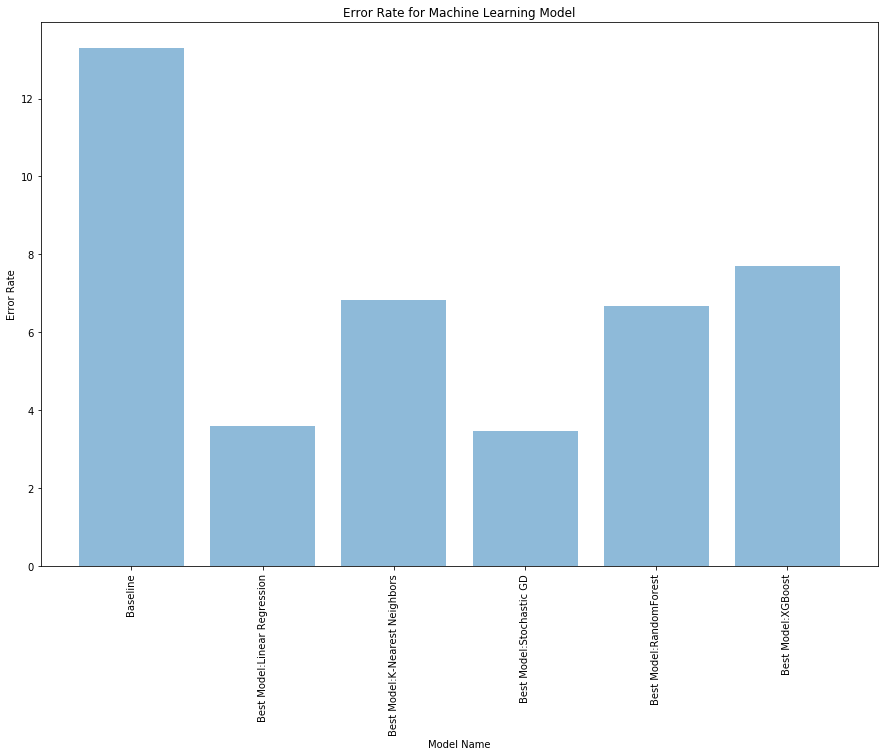

In [111]:
plt.bar(results['ExpID'],results['Test Error'],align='center', alpha=0.5)
plt.ylabel('Error Rate')
plt.xlabel('Model Name')
plt.xticks(rotation=90)

plt.title('Error Rate for Machine Learning Model')
 
plt.show()

# # Artificial Neural Networks With Keras

In [102]:
from keras import backend as K

# This function will be used to create the scoring metric for the keras regressor
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [634]:
# Create a transformed array of values from the preparation pipelines
ann_train = pca_pipe.fit_transform(X_train)
ann_test = pca_pipe.fit_transform(X_test)

In [624]:
model = Sequential()
model.add(Dense(40,activation='relu',input_dim=40, kernel_initializer='normal',kernel_regularizer=regularizers.L1L2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(41,activation='tanh',kernel_initializer='normal',kernel_regularizer=regularizers.L1L2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))
model.add(Dropout(0.2))
model.compile(loss=rmse,optimizer='SGD', metrics=[rmse])

In [625]:
%%time
start = time.time()
history = model.fit(xgb_train, y_train.values,validation_data=(xgb_test, y_test.values), epochs=100, 
                    batch_size=60, 
                    verbose=1)
train_time = np.round(time.time()-start,2)

Train on 7344 samples, validate on 918 samples
Epoch 1/100
7344/7344 [==============================] - 21s 3ms/step - loss: 14.4485 - rmse: 13.3442 - val_loss: 14.0535 - val_rmse: 13.1244
Epoch 2/100
7344/7344 [==============================] - 1s 183us/step - loss: 14.1411 - rmse: 13.3589 - val_loss: 13.7677 - val_rmse: 13.1239
Epoch 3/100
7344/7344 [==============================] - 1s 182us/step - loss: 13.9018 - rmse: 13.3691 - val_loss: 13.5538 - val_rmse: 13.1236
Epoch 4/100
7344/7344 [==============================] - 1s 187us/step - loss: 13.7056 - rmse: 13.3560 - val_loss: 13.3988 - val_rmse: 13.1231
Epoch 5/100
7344/7344 [==============================] - 1s 189us/step - loss: 13.5806 - rmse: 13.3605 - val_loss: 13.2931 - val_rmse: 13.1229
Epoch 6/100
7344/7344 [==============================] - 1s 186us/step - loss: 13.4932 - rmse: 13.3598 - val_loss: 13.2233 - val_rmse: 13.1228
Epoch 7/100
7344/7344 [==============================] - 1s 186us/step - loss: 13.4243 - rmse: 1

In [626]:
start = time.time()
model.predict(xgb_test)
test_time = np.round(time.time()-start,2)

In [627]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1719 (Dense)           (None, 40)                1640      
_________________________________________________________________
dropout_1718 (Dropout)       (None, 40)                0         
_________________________________________________________________
dense_1720 (Dense)           (None, 41)                1681      
_________________________________________________________________
dropout_1719 (Dropout)       (None, 41)                0         
_________________________________________________________________
dense_1721 (Dense)           (None, 1)                 42        
_________________________________________________________________
dropout_1720 (Dropout)       (None, 1)                 0         
Total params: 3,363
Trainable params: 3,363
Non-trainable params: 0
_________________________________________________________________


In [628]:
history.history.keys()

dict_keys(['val_loss', 'val_rmse', 'loss', 'rmse'])

In [629]:
train_rmse_mean = np.round(np.mean(history.history["rmse"]),2)
train_rmse_std = np.round(np.std(history.history["rmse"]),2)

test_rmse_mean = np.round(np.mean(history.history["val_loss"]),2)
test_rmse_std = np.round(np.std(history.history["val_loss"]),2)
ann_base_score = train_rmse_mean

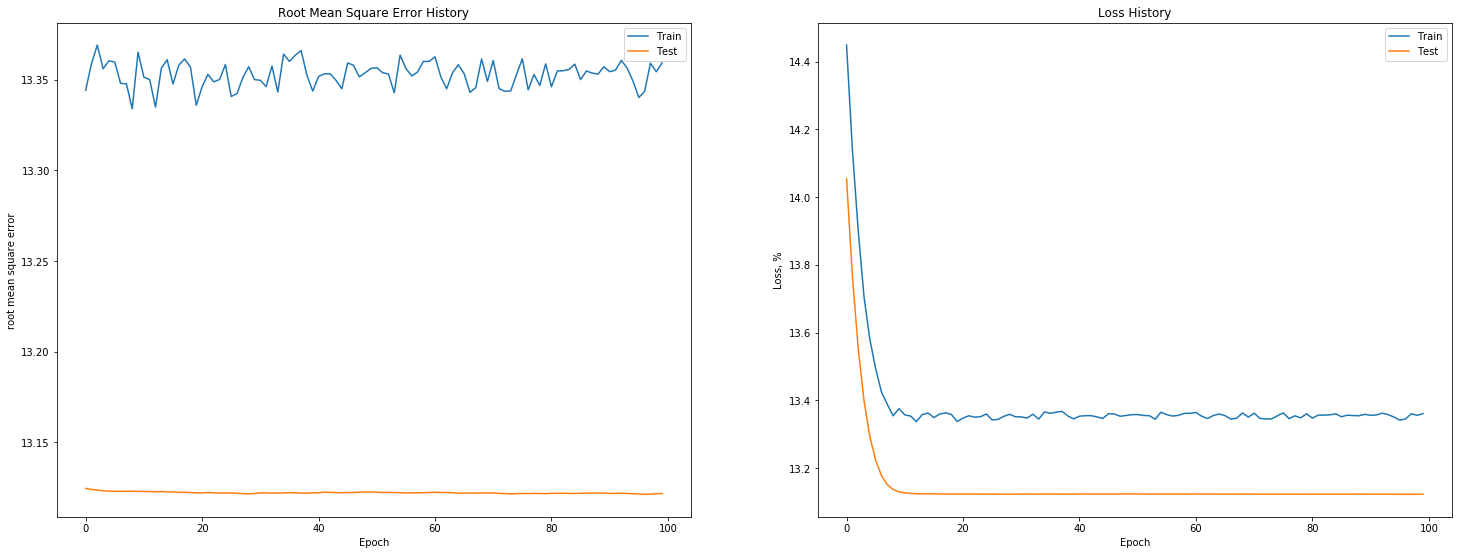

In [630]:
plt.figure(figsize=(25, 20))

plt.subplot(221)
plt.plot(history.history["rmse"], label="Train")
plt.plot(history.history['val_rmse'], label="Test")
plt.ylabel('root mean square error')
plt.xlabel("Epoch")
plt.title("Root Mean Square Error History")
plt.legend();

plt.subplot(222)
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Test")
plt.ylabel("Loss, %")
plt.xlabel("Epoch")
plt.title("Loss History")
plt.legend()


This plot shows slight variance between the train scores and the test scores. This could indicates a slight case of underfitting where the training data is performing poorly. Crossvalidation of the dataset would provide a evaluation of the variance

***Create results table ***

In [631]:
results.loc[len(results)]=["Base ANN Regressor", test_rmse_mean, "--", train_time, test_time, {"relu,tanh,rmsprop"}]

In [632]:
results

ExpID  Test Error p-value  Train Time(s)  Test Time(s)  \
0            Baseline   13.288037      --           0.00          0.00   
1  Base ANN Regressor   13.150000      --         156.04          8.06   

  Experiment description  
0                     --  
1    {relu,tanh,rmsprop}

## ANN Optimization with GridSearchCV

In [612]:
def create_model(kernel_initializer='uniform'):
    model = Sequential()
    model.add(Dense(40,activation='relu',kernel_initializer=kernel_initializer,kernel_regularizer=regularizers.L1L2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(41,activation='tanh',kernel_initializer=kernel_initializer,kernel_regularizer=regularizers.L1L2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer=kernel_initializer,activation='linear'))
    model.add(Dropout(dropout))
    model.compile(loss="mean_squared_error",optimizer="SGD", metrics=["mse"])
    return model

In [613]:
def run_GridSearch(X_train, y_train, pipeline, param_grid):     
    grid = GridSearchCV(pipeline, cv=3, param_grid=param_grid)
    grid.fit(X_train, y_train)
    print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
    
    train_means = np.round(grid.cv_results_['mean_train_score'].mean()) 
    train_stds = np.round(grid.cv_results_['std_train_score'].mean())
    train_time = np.round(grid.cv_results_['mean_fit_time'].mean())

    
    test_means = np.round(grid.cv_results_['mean_test_score'].mean())
    test_stds = np.round(grid.cv_results_['std_test_score'].mean())
    test_time = np.round(grid.cv_results_['mean_score_time'].mean())
    
    params = grid.best_params_
    return train_means, train_stds,test_time,test_means, test_stds, test_time,params

In [615]:
param_grid = {
    'keras__batch_size': [50,70],
    'keras__epochs':[30,50],
    'keras__kernel_initializer':['uniform','normal'],
}

# wrap the model using the function we created
clf = KerasRegressor(build_fn=create_model,verbose=1)
    
full_pipeline_with_keras = Pipeline([
    ('pca_pipe',pca_pipe),
    ("keras", clf)
])
    
if __name__ == '__main__':
    train_means, train_stds,test_time,test_means, test_stds, test_time,params = run_GridSearch(X_train, y_train.values, full_pipeline_with_keras, param_grid)

In [574]:
(t_stat, p_value) = stats.ttest_rel(ann_base_score, train_means)

In [616]:
results.loc[len(results)]=["ANN Regressor Optimized", test_means, p_value, train_time, test_time, {params}]

In [ ]:
results

# Results
The Results table is showing the results of the gridsearch. The gridsearch found that the Logistic Regression was the best at predicting a value just 2.3 points away from its target. However, Logistic Regression did have a training time that was on the longer side. That means that for example the model is just 2.3 points from predicting if the game will beat the spread. That is incredible close and much better than the baseline was about 14 points. K nearest neighbors also gave a similar result. The values proved to be more significant than the baseline which is 100% accurate.  


**BEST HYPERPARAMETERS**
1. Linear Regression: Best Parameters:
	predictor__normalize: False
+ KNN: Best Parameters:
	predictor__n_neighbors: 20
	predictor__p: 2
	predictor__weights: distance
+ Logistic Regression: Best Parameters:
	predictor__C: 0.001
	predictor__penalty: l1
+ Stochastic GD: Best Parameters:
	predictor__alpha: 0.1
	predictor__loss: squared_loss
	predictor__penalty: elasticnet
	predictor__tol: 0.0001
+ Random Forest: Best Parameters:
	predictor__bootstrap: False
	predictor__max_depth: 30
	predictor__max_features: 5
	predictor__min_samples_leaf: 3
	predictor__min_samples_split: 15
	predictor__n_estimators: 200

In [135]:
results

ExpID  Test Error p-value  Train Time(s)  \
0                      Baseline   13.288037      --         0.0010   
1  Best Model:Linear Regression    3.316625       0         0.3471   

   Test Time(s)            Experiment description  
0         0.000                                --  
1         0.012  [["predictor__normalize", true]]